## Importing required libraries

In [1]:
# Importing the library and name it as pd
import pandas as pd

# Import library for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Import Linear Regression library
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import *

# Import math library for mathematical functions
import math as m

# Importing motion chart library
from motionchart.motionchart import MotionChart

# Importing numpy
import numpy as np

# Task A: Investigating Natural Increase in Australia's population

## A1. Investigating the Births, Deaths and TFR Data

In [2]:
# Storing the location of the required files
# Plese change the file path to run the rest of the code
births = 'C:/Users/veruv/Data Science Jupyter Notebook/Assignments/Intro to Data Science/Assignment 1/Datasets-20190825/Datasets/Task A/Births.csv'
deaths = 'C:/Users/veruv/Data Science Jupyter Notebook/Assignments/Intro to Data Science/Assignment 1/Datasets-20190825/Datasets/Task A/Deaths.csv'
tfr = 'C:/Users/veruv/Data Science Jupyter Notebook/Assignments/Intro to Data Science/Assignment 1/Datasets-20190825/Datasets/Task A/TFR.csv'
nom = 'C:/Users/veruv/Data Science Jupyter Notebook/Assignments/Intro to Data Science/Assignment 1/Datasets-20190825/Datasets/Task A/NOM.csv'
nim = 'C:/Users/veruv/Data Science Jupyter Notebook/Assignments/Intro to Data Science/Assignment 1/Datasets-20190825/Datasets/Task A/NIM.csv'

In [3]:
# Read births.csv file using pandas
birthsReport = pd.read_csv(births)

### A1.1. Using Python, plot the number of births recorded in each state/territory for different Australian states over different years.

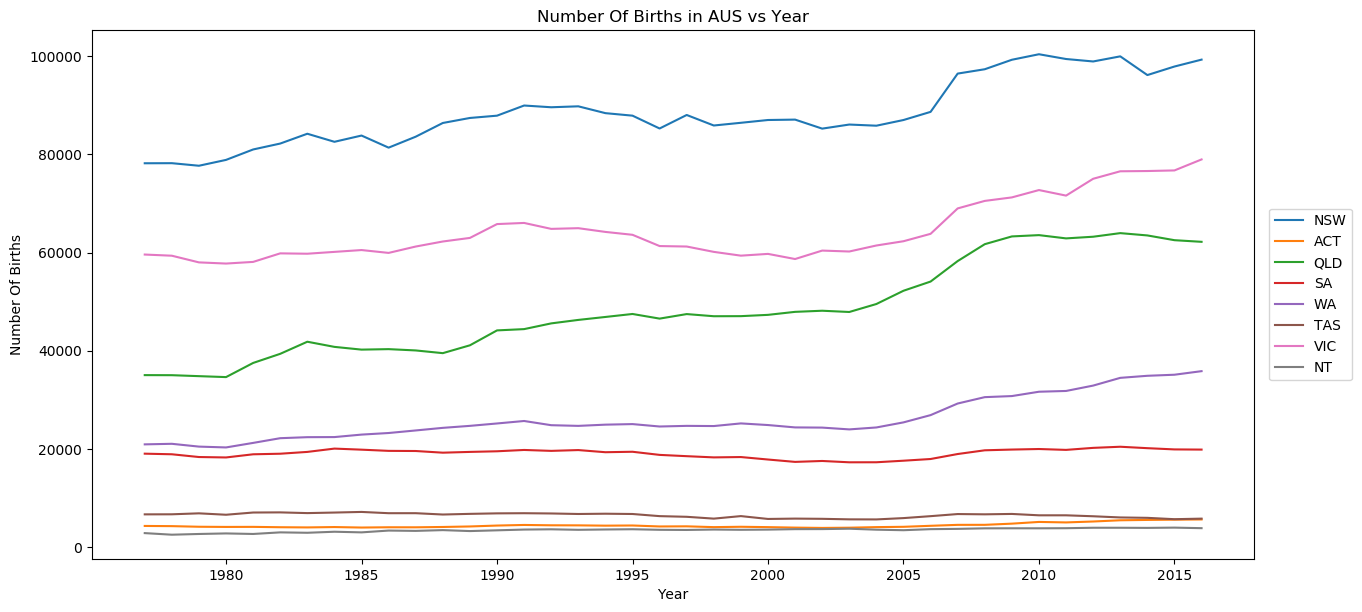

In [4]:
# Define the figure size
plt.figure(figsize=[15,7], dpi=100)

# Plotting the graph
plt.plot(birthsReport['Year'], birthsReport['NSW'], label = 'NSW')
plt.plot(birthsReport['Year'], birthsReport['ACT'], label = 'ACT')
plt.plot(birthsReport['Year'], birthsReport['QLD'], label = 'QLD')
plt.plot(birthsReport['Year'], birthsReport['SA'], label = 'SA')
plt.plot(birthsReport['Year'], birthsReport['WA'], label = 'WA')
plt.plot(birthsReport['Year'], birthsReport['TAS'], label = 'TAS')
plt.plot(birthsReport['Year'], birthsReport['VIC'], label = 'VIC')
plt.plot(birthsReport['Year'], birthsReport['NT'], label = 'NT')

plt.xlabel('Year')
plt.ylabel('Number Of Births')
plt.title('Number Of Births in AUS vs Year')

plt.legend(loc = 'center right', bbox_to_anchor=(1.09, 0.5))
plt.show()

### A1.1.a. Describe the trend in number of births for Queensland and Tasmania for the period 1977 to 2016?

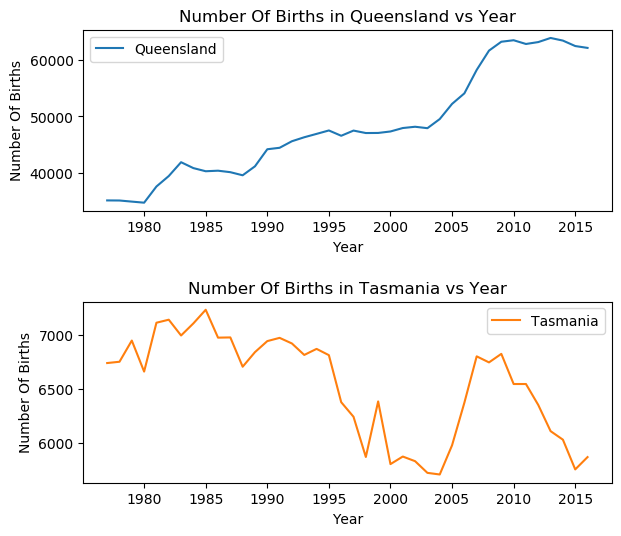

In [86]:
# Define the figure size
plt.figure(figsize=[15,6], dpi=100)

# Plotting graph for QLD
plt.subplot(2,2,1)
plt.subplots_adjust(hspace=0.50)
plt.xlabel('Year')
plt.ylabel('Number Of Births')
plt.title('Number Of Births in Queensland vs Year')
plt.plot(birthsReport['Year'], birthsReport['QLD'], label = 'Queensland')
plt.legend()

# Plotting graph for TAS
plt.subplot(2,2,3)
plt.xlabel('Year')
plt.ylabel('Number Of Births')
plt.title('Number Of Births in Tasmania vs Year')
plt.plot(birthsReport['Year'], birthsReport['TAS'], color = 'C1', label = 'Tasmania')
plt.legend()

plt.show()

**Ans :** From the above three graph plots, we can see that over the years (1977 - 2016), number of births in QLD increased steadily from about 8000 to 10,000 whereas number of births in TAS decreased from about 6,700 to close to 6,000 over the same range of years. We can notice that number of births in QLD has couple of dips around years 1967 and 2003, while the number of births in TAS has many ups and downs. The third graph of TAS shows significant drop in the number of births for TAS from 1994 to 1998, sharp rise in the year 1999, again a dip until 2004 and dramatic increment until 2007 followed by downfall by 2016. The lowest and highest number of births in QLD are about 30,000 and 65,000 whereas for that of TAS are about 5,000 and 7,500 respectively. We can also notice that overall, QLD has higher birth rate/number of births compared to that of TAS.

### A1.1.b. Draw a bar chart to show the number of births in each Australian state in 2016.

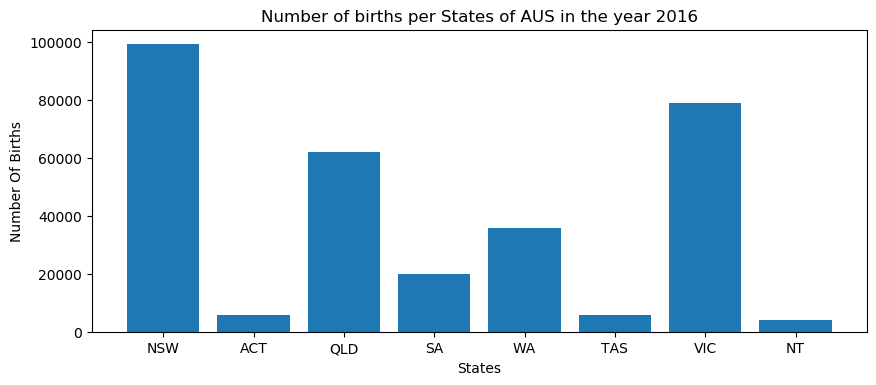

In [6]:
# Storing column names/ states names into a list 
birthStatesList = birthsReport.columns.tolist()[1:]

# Filtering for year 2016 and storing total number of births per state in a list 
filt = (birthsReport.Year == 2016)
df = birthsReport[filt]
numberOfBirths = df.values.tolist()[0][1:]

# Define the figure size
plt.figure(figsize=[10,4], dpi=100)

# Plotting the graph
plt.bar(birthStatesList, numberOfBirths)
plt.ylabel('Number Of Births')
plt.xlabel('States')
plt.title('Number of births per States of AUS in the year 2016')
plt.show()

### A1.2. We will now investigate the trend in the total number of births over different years. For this, you will need to aggregate the total number of births registered in Australia by year.

In [7]:
# Storing sum of all births per year into a list
totalBirthsPerYear = birthsReport.values[:,1:].sum(axis=1).tolist()

### A1.2.a. Fit a linear regression using Python to the above aggregated data (i.e., total number of births registered in Australia over time) and plot the linear fit.

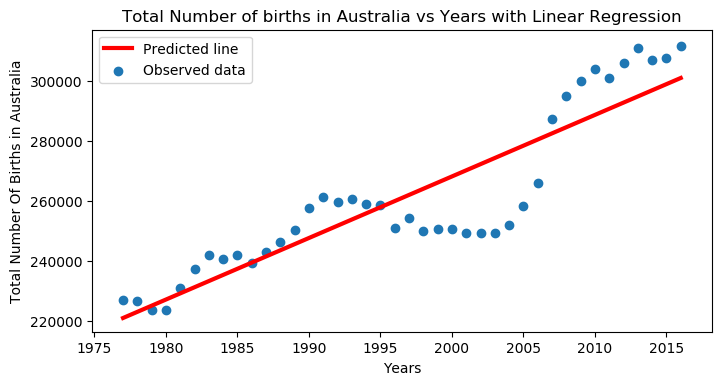

In [8]:
# Define the figure size
plt.figure(figsize=[8,4], dpi=100)

# We use a standard scipy package: 
slope, intercept, r_value, p_value, std_err = linregress(birthsReport.Year, totalBirthsPerYear)
# Here's our function:
totalBirthsFit = [slope*xi + intercept for xi in birthsReport.Year]
# plot up the line
plt.plot(birthsReport.Year,totalBirthsFit,'r-', linewidth=3)
#  plot up the data points
plt.scatter(birthsReport.Year, totalBirthsPerYear)
plt.ylabel('Total Number Of Births in Australia')
plt.xlabel('Years')
plt.title('Total Number of births in Australia vs Years with Linear Regression')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

### A1.2.b. Does it look like a good fit to you? Identify the period time having any unusual trend(s) in your plot.

**Ans :** No, linear regression(line) doesn't seems to a good fit. There are data set points far away from the predicted line. We can see unusual trend between the years 1995 and 2007 (the curve takes a dip and then increases from the year 2008).

### A1.2.c. Use the linear fit to predict the total births in Australia for the years 2050 and 2100.

In [9]:
# Use the linear fit to predict the total births in Australia for the years 2050 and 2100.

# We use a standard scipy package: 
slope, intercept, r_value, p_value, std_err = linregress(birthsReport.Year, totalBirthsPerYear)
# Here's our function:
birthsFit = [slope*xi + intercept for xi in [2050, 2100]]
print('The predicted total number of births in Australia for the year 2050 : ', m.floor(birthsFit[0]))
print('The predicted total number of births in Australia for the year 2100 : ', m.floor(birthsFit[1]))

The predicted total number of births in Australia for the year 2050 :  370945
The predicted total number of births in Australia for the year 2100 :  473754


### A1.2.d. Instead of fitting the linear regression to all of the data, try fitting it to just the most recent data points (say from 2010 onwards). How is the fit? Which model would give better predictions of future population of Australia do you think and why?

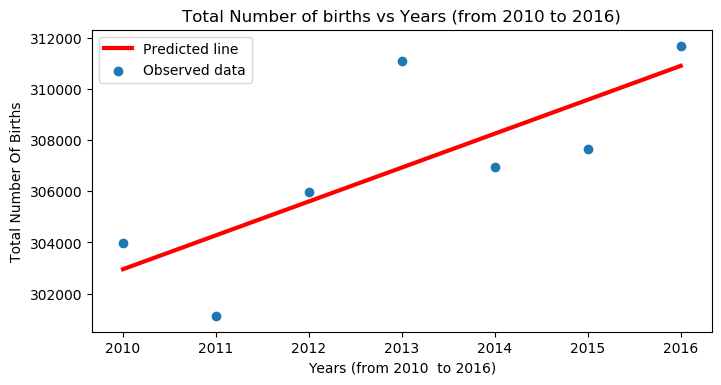

The predicted total number of births in Australia for the year 2050 :  355966
The predicted total number of births in Australia for the year 2100 :  422230


In [10]:
# Filering the dataframe based on a condition
filt = (birthsReport.Year >= 2010)
newBirthsReport = birthsReport[filt]

totalBirths = newBirthsReport.values[:,1:].sum(axis=1).tolist()

# Define the figure size
plt.figure(figsize=[8,4], dpi=100)

# We use a standard scipy package: 
slope, intercept, r_value, p_value, std_err = linregress(newBirthsReport.Year, totalBirths)
# Here's our function:
totalBirthsFit = [slope*xi + intercept for xi in newBirthsReport.Year]
# plot up the line
plt.plot(newBirthsReport.Year,totalBirthsFit,'r-', linewidth=3)
#  plot up the data points
plt.scatter(newBirthsReport.Year, totalBirths)
plt.ylabel('Total Number Of Births')
plt.xlabel('Years (from 2010  to 2016)')
plt.title('Total Number of births vs Years (from 2010 to 2016)')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Model fit for the years 2050, 2100
birthsFit = [slope*xi + intercept for xi in [2050, 2100]]
print('The predicted total number of births in Australia for the year 2050 : ', m.floor(birthsFit[0]))
print('The predicted total number of births in Australia for the year 2100 : ', m.floor(birthsFit[1]))

**Ans :** Although linear regression model fits better for the recent set of data, it still isn't a proper fit. I feel that the above model would give better predictions to future population of Australia compared to the previous model which considers all the data points. This is because the there are less data points that deviate (not far) from the line implying that this model has less variance whereas for the previous model, there were many data sets far from the line (Also, each data set had high value) resulting in high variance.

### A1.2.e. Challenge: Can you think of a better model than linear regression to fit to all of the data to capture the trend in the number of births.

**Ans :** I feel that the model that would fit better than linear regression is polynomial. Below is the implementation of poly fit.

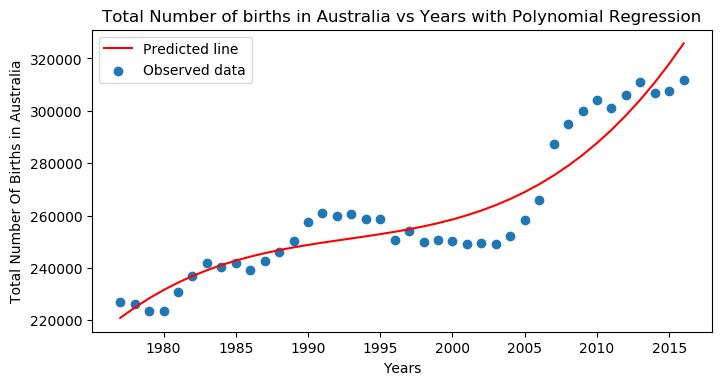

In [11]:
# Fetching required data 
yearList = np.array(birthsReport.Year).reshape(-1, 1)
totalBirthsPerYear = np.array(totalBirthsPerYear).reshape(-1, 1)

# Logic for polynomial fit
poly = PolynomialFeatures(degree=3, include_bias=False) #the bias is avoiding the need to intercept
yearListCoeff = poly.fit_transform(yearList)
new_model = LinearRegression()
new_model.fit(yearListCoeff,totalBirthsPerYear)
totalBirthsPerYearPrediction = new_model.predict(yearListCoeff)

# Define the figure size
plt.figure(figsize=[8,4], dpi=100)

# Plotting
plt.scatter(yearList,totalBirthsPerYear)
plt.plot(yearListCoeff[:,0], totalBirthsPerYearPrediction, 'r')
plt.ylabel('Total Number Of Births in Australia')
plt.xlabel('Years')
plt.title('Total Number of births in Australia vs Years with Polynomial Regression')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

### A1.2.e.i. Describe the model you suggested and explain why it is better suited for this task.

**Ans :** The polynomial model fits the polynomial of assigned degree to the actual data set points. It returns vector of coefficients which minimises the squared error in the order of degree of that polynomial. Also, the polynomial curve will cover the increasing and decreasing trend of the actual data set unlike the line in linear regression model. By trial and error method of fixing the degree of the polynomial, I was able to find the best fit. As polynomial curve covers most data set points with minimum variance, I feel that it is definitely best fit for given data set points.

### A1.2.e.ii. Use your model to predict the total births for the years 2050 and 2100.

In [12]:
# Use your model to predict the total births for the years 2050 and 2100.
# Degree 2

# Logic for polynomial fit
poly = PolynomialFeatures(degree=2, include_bias=False) #the bias is avoiding the need to intercept
yearListCoeff = poly.fit_transform(yearList)
new_model = LinearRegression()
new_model.fit(yearListCoeff,totalBirthsPerYear)
totalBirthsPerYearPrediction = new_model.predict(yearListCoeff)

yearListCoeff = poly.fit_transform([[2050],[2100]])
totalBirthsPerYearPrediction = new_model.predict(yearListCoeff)
print('The predicted total number of births in Australia for the year 2050 : ', m.floor(totalBirthsPerYearPrediction[0][0]))
print('The predicted total number of births in Australia for the year 2100 : ', m.floor(totalBirthsPerYearPrediction[1][0]))

The predicted total number of births in Australia for the year 2050 :  507485
The predicted total number of births in Australia for the year 2100 :  1003052


In [13]:
# Use your model to predict the total births for the years 2050 and 2100.
# Degree 3

# Logic for polynomial fit
poly = PolynomialFeatures(degree=3, include_bias=False) #the bias is avoiding the need to intercept
yearListCoeff = poly.fit_transform(yearList)
new_model = LinearRegression()
new_model.fit(yearListCoeff,totalBirthsPerYear)
totalBirthsPerYearPrediction = new_model.predict(yearListCoeff)

yearListCoeff = poly.fit_transform([[2050],[2100]])
totalBirthsPerYearPrediction = new_model.predict(yearListCoeff)
print('The predicted total number of births in Australia for the year 2050 : ', m.floor(totalBirthsPerYearPrediction[0][0]))
print('The predicted total number of births in Australia for the year 2100 : ', m.floor(totalBirthsPerYearPrediction[1][0]))

The predicted total number of births in Australia for the year 2050 :  1137796
The predicted total number of births in Australia for the year 2100 :  5872321


In [14]:
# Use your model to predict the total births for the years 2050 and 2100.
# Degree 4

# Logic for polynomial fit
poly = PolynomialFeatures(degree=4, include_bias=False) #the bias is avoiding the need to intercept
yearListCoeff = poly.fit_transform(yearList)
new_model = LinearRegression()
new_model.fit(yearListCoeff,totalBirthsPerYear)
totalBirthsPerYearPrediction = new_model.predict(yearListCoeff)

yearListCoeff = poly.fit_transform([[2050],[2100]])
totalBirthsPerYearPrediction = new_model.predict(yearListCoeff)
print('The predicted total number of births in Australia for the year 2050 : ', m.floor(totalBirthsPerYearPrediction[0][0]))
print('The predicted total number of births in Australia for the year 2100 : ', m.floor(totalBirthsPerYearPrediction[1][0]))

The predicted total number of births in Australia for the year 2050 :  1148778
The predicted total number of births in Australia for the year 2100 :  6049892


In [15]:
# Use your model to predict the total births for the years 2050 and 2100.
# Degree 5

# Logic for polynomial fit
poly = PolynomialFeatures(degree=5, include_bias=False) #the bias is avoiding the need to intercept
yearListCoeff = poly.fit_transform(yearList)
new_model = LinearRegression()
new_model.fit(yearListCoeff,totalBirthsPerYear)
totalBirthsPerYearPrediction = new_model.predict(yearListCoeff)

yearListCoeff = poly.fit_transform([[2050],[2100]])
totalBirthsPerYearPrediction = new_model.predict(yearListCoeff)
print('The predicted total number of births in Australia for the year 2050 : ', m.floor(totalBirthsPerYearPrediction[0][0]))
print('The predicted total number of births in Australia for the year 2100 : ', m.floor(totalBirthsPerYearPrediction[1][0]))

The predicted total number of births in Australia for the year 2050 :  1159882
The predicted total number of births in Australia for the year 2100 :  6233457


**Ans :** We can deduce from the above results that degrees 2 and 3 give us the realistic prediction compared to linear fit and polyfit with other degrees. There should be some variance such that observed data points and predicted data points depict same trend but shouldn't match exactly. Matching would lead to over fitting and our model would work only for the given data points and not for other data points from different range.

### A1.3.a. What was the minimum value for TFR recorded in the dataset for Queensland and when did that occur? What was the corresponding TFR value for Northern Territory in the same year?

In [16]:
# Read tfr.csv file using pandas
tfrReport = pd.read_csv(tfr)

In [17]:
tfrDF = tfrReport[['Year','QLD','NT']]
print('Minimum value for QLD : ',tfrDF.QLD.min())
print('Year in which QLD hit minimum value : ', tfrDF.loc[tfrDF.QLD == tfrDF.QLD.min(), 'Year'].iloc[0])
print('============================================')
print('Corresponding value for NT in same year when QLD hit minimum : ', tfrDF.loc[tfrDF.QLD == tfrDF.QLD.min(), 'NT'].iloc[0])

Minimum value for QLD :  1.8
Year in which QLD hit minimum value :  1999
Corresponding value for NT in same year when QLD hit minimum :  2.123


### A1.4. Plot the natural growth in Australia's population over different years.

In [18]:
# Read deaths.csv file using pandas
deathsReport = pd.read_csv(deaths)

In [19]:
# Storing data into the required lists to plot
totalBirthsPerYear = birthsReport.values[:,1:].sum(axis=1).tolist()
totalDeathsPerYear = deathsReport.values[:,1:].sum(axis=1).tolist()

naturalGrowth = []

for i in range(len(totalBirthsPerYear)):
    naturalGrowth.append(totalBirthsPerYear[i]-totalDeathsPerYear[i])

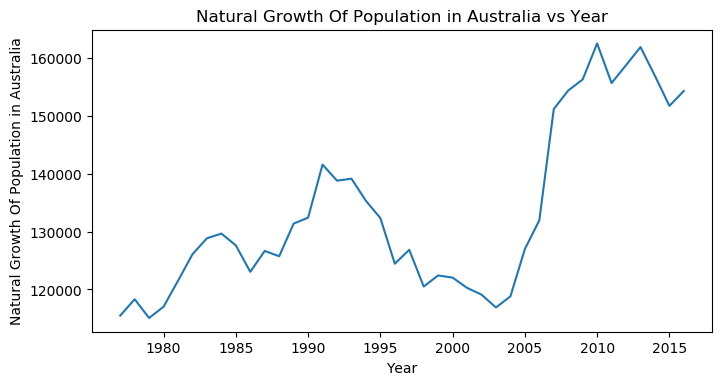

In [20]:
# Define the figure size
plt.figure(figsize=[8,4], dpi=100)

# Plotting the graph
plt.plot(birthsReport.Year, naturalGrowth)
plt.xlabel('Year')
plt.ylabel('Natural Growth Of Population in Australia')
plt.title('Natural Growth Of Population in Australia vs Year')
plt.show()

### A1.4.a. Describe the trend in natural growth in Australian population over time using linear regression?

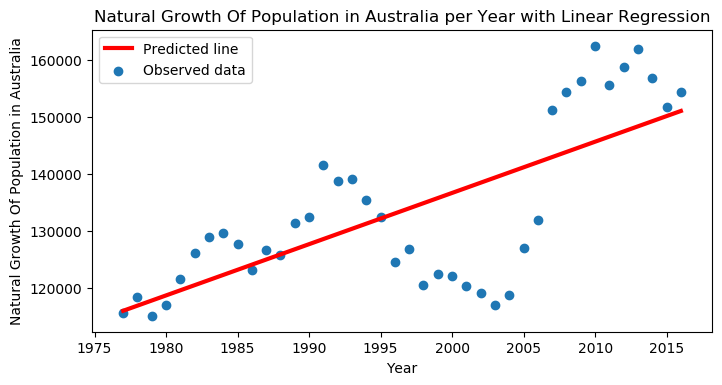

In [87]:
# Define the figure size
plt.figure(figsize=[8,4], dpi=100)

# We use a standard scipy package: 
slope, intercept, r_value, p_value, std_err = linregress(birthsReport.Year, naturalGrowth)
# Here's our function:
naturalGrowthFit = [slope*xi + intercept for xi in birthsReport.Year]
# plot up the line
plt.plot(birthsReport.Year,naturalGrowthFit,'r-', linewidth=3)
#  plot up the data points
plt.scatter(birthsReport.Year, naturalGrowth)
plt.xlabel('Year')
plt.ylabel('Natural Growth Of Population in Australia')
plt.title('Natural Growth Of Population in Australia per Year with Linear Regression')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

**Ans :** The above graph depicts the natural growth of population in Australia over the years 1977 to 2016. The red line represents the prediction whereas the dots represent the observed or actual data points. From the graph, we can deduce that natural growth of population in Australia deviated by huge factor from the expected path for years 1995 to 2007. For those years, natural growth of population dropped drastically until the year 2003 and then it increased from 2005. Again, from the year 2007, we can see that natural growth of population increased (deviated from expected path) and met the expected path by the year 2016.

## A2. Investigating the Migration Data (NOM and NIM)

### A2.1.a. Use Python to plot the NOM to Victoria, Tasmania and Western Australia over time. Explain and compare the trend in all three states (VIC, TAS and WA).

In [22]:
# Read NOM.csv file using pandas
nomReport = pd.read_csv(nom)

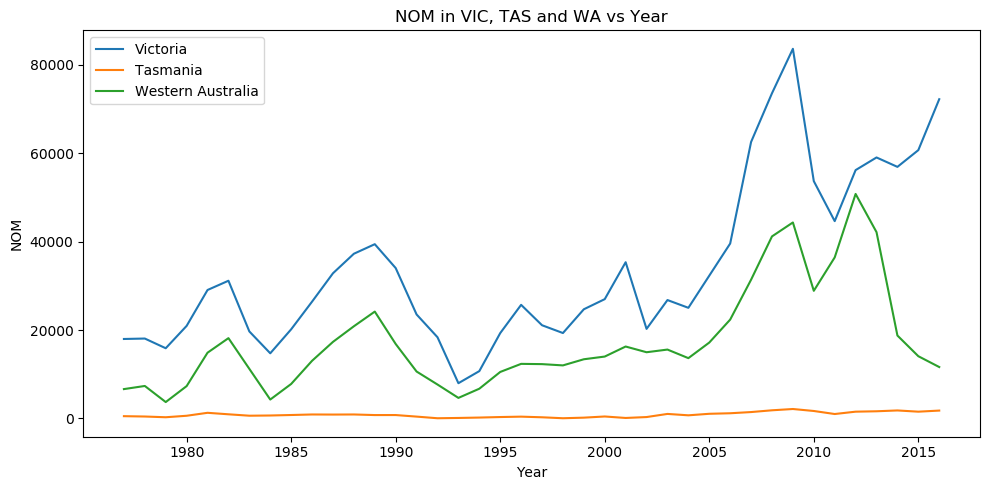

In [23]:
# Define the figure size
plt.figure(figsize=[10,5], dpi=100)

# Plot the graph
plt.plot(nomReport['Year'], nomReport['VIC'], label = 'Victoria')
plt.plot(nomReport['Year'], nomReport['TAS'], color = 'C1', label = 'Tasmania')
plt.plot(nomReport['Year'], nomReport['WA'], color = 'C2', label = 'Western Australia')

plt.legend(loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('NOM')
plt.title('NOM in VIC, TAS and WA vs Year')

plt.tight_layout()
plt.show()

**Ans :** The above graph displays NOM in VIC, TAS and WA vs Year. From the graph, we can deduce that NOM of VIC is the highest whereas NOM of TAS is the least. We can also notice that NOM of VIC and WA have variations in their trend over a period of time while NOM of TAS was almost steady.

For VIC, highest NOM of over 80,000 was observed in the year 2009 and the least NOM of about 10,000 was observed in the year 1993. Also, we see some sharp increase and decrease in the trend between the years 1984-1993 and 2004-2011.

For WA, highest NOM of about 50,000 was noticed in the year 2012 and the least NOM of around 5000 wasobserved in the year 1979. Like VIC's NOM trend, we can see many drastic rise and falls.

We can't comment about TAS's NOM trend as this graph doesn't gives proper idea.

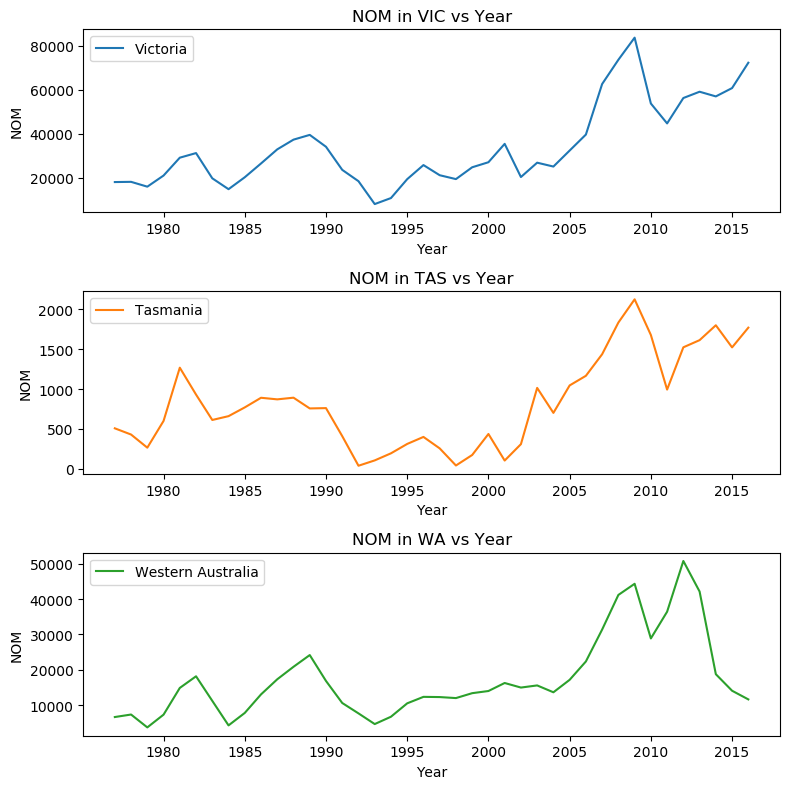

In [24]:
# Define the figure size
plt.figure(figsize=[8,8], dpi=100)

# Plot the graph
# For VIC
plt.subplot(3,1,1)
plt.subplots_adjust(hspace=0.9)
plt.plot(nomReport['Year'], nomReport['VIC'], label = 'Victoria')
plt.legend(loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('NOM')
plt.title('NOM in VIC vs Year')

# For TAS
plt.subplot(3,1,2)
plt.subplots_adjust(hspace=0.9)
plt.plot(nomReport['Year'], nomReport['TAS'], color = 'C1', label = 'Tasmania')
plt.legend(loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('NOM')
plt.title('NOM in TAS vs Year')

# For WA
plt.subplot(3,1,3)
plt.subplots_adjust(hspace=0.9)
plt.plot(nomReport['Year'], nomReport['WA'], color = 'C2', label = 'Western Australia')
plt.legend(loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('NOM')
plt.title('NOM in WA vs Year')

plt.tight_layout()
plt.show()

**Ans :** In continuation to the above, these subplots in the above cell present us better idea about the trends in NOM of VIC, WA and TAS. The consolidated plot of NOM of VIC, TAS and WA didn't give us idea about TAS's trend whereas with the subplot above, we can deduce that for TAS, NOM ranges from as low as 100 to over 2000. Highest NOM for TAS was observed in the year 2009 and the least NOM for TAS was noticed in the year 1992. Also, like WA and VIC, we can see that there are few rise and falls in the NOM trend for TAS.

### A2.1.b. Plot the Net Overseas Migration (NOM) to Australia over time.

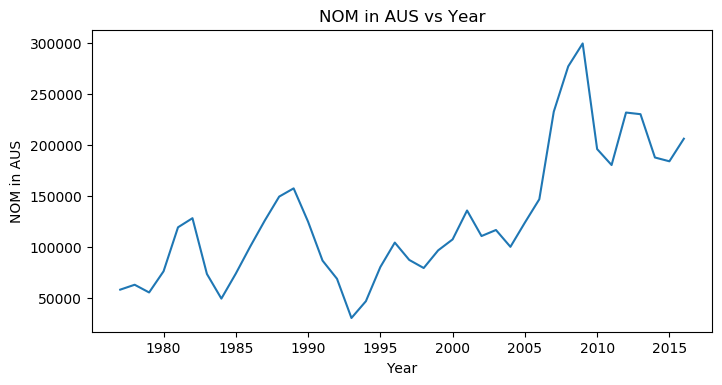

In [25]:
# Calculate nom per year
nomPerYear = nomReport.values[:,1:].sum(axis=1).tolist()

# Define the figure size
plt.figure(figsize=[8,4], dpi=100)

# Plotting the graph
plt.plot(nomReport.Year, nomPerYear)
plt.xlabel('Year')
plt.ylabel('NOM in AUS')
plt.title('NOM in AUS vs Year')
plt.show()

**Ans :** From my research on net, I found out that during 1976–1977, natural increase represented 66.6 per cent of Australia’s population growth and NOM 33.4 per cent; by 2016–17, natural increase represented only 36.0 per cent of Australia’s population growth with NOM at 64.0 per cent. Interestingly, the increase in NOM in recent years has not been caused by an increase in permanent settlers. Rather it has been driven by people staying in Australia on long-term temporary visas, such as overseas students and temporary skilled migrants.

It is also worth noting that whilst natural increase is largely outside of government control, migration (NOM) can be influenced by a range of factors including government policy (in particular migration policy), the state of the Australian economy and labour market, and the existing patterns of settlement.

Ref : https://www.aph.gov.au/About_Parliament/Parliamentary_Departments/Parliamentary_Library/pubs/rp/rp1819/Quick_Guides/PopulationStatistics


NOM has more than doubled from 146,800 persons in 2005-06 to a preliminary NOM estimate of 298,900 persons in 2008-09, the highest on record. The increase is partially due to a change in methodology introduced after 30 June 2006. However, the main driver during this period has been the substantial growth in temporary visa arrivals to Australia's shores 

Temporary migration has become increasingly important with more international students, business entrants, working holiday makers and other long-term visitors staying in Australia for periods up to four years or more. Over recent years, there has also been a continued increase of temporary entrants applying for permanent residency or other visas whilst onshore. These changing patterns in traveller behaviour over time have created challenges for the Australian Bureau of Statistics (ABS) in accurately measuring Australia's net overseas migration. In response to this challenge, the ABS has made some improvements to methodology and processing systems to more accurately capture these changes, and ultimately to improve the quality of NOM estimation. The Australian Department of Immigration and Citizenship's ability to capture and process all traveller information combined with the ABS's improved methodology and additional processing, has placed Australia's measurement of NOM amongst the world's best practice.

Ref : 
https://www.abs.gov.au/ausstats/abs@.nsf/Products/E11A2CBD400BF066CA25776E0017776F?opendocument


### A2.2.a. Use Python to combine the data from the different files into a single table. The resultingtable should contain the NOM and NIM values for each of the states for a given year. Whatare the first year and last year for the combined data?

In [26]:
# Read NOM.csv file using pandas
nomReport = pd.read_csv(nom)

In [27]:
# Read NIM.csv file using pandas
nimReport = pd.read_csv(nim)

In [28]:
nomNimDF = pd.merge(nomReport, nimReport, how='inner', on = 'Year')
nomNimDF = nomNimDF.rename(columns=
{'NSW_x': 'NSW_NOM', 'VIC_x': 'VIC_NOM', 'QLD_x': 'QLD_NOM', 'SA_x': 'SA_NOM','WA_x': 'WA_NOM','TAS_x': 'TAS_NOM', 'NT_x': 'NT_NOM', 'ACT_x': 'ACT_NOM',
 'NSW_y': 'NSW_NIM', 'VIC_y': 'VIC_NIM', 'QLD_y': 'QLD_NIM', 'SA_y': 'SA_NIM','WA_y': 'WA_NIM','TAS_y': 'TAS_NIM', 'NT_y': 'NT_NIM', 'ACT_y': 'ACT_NIM'
})

nomNimDF.head()

,Year,NSW_NOM,VIC_NOM,QLD_NOM,SA_NOM,WA_NOM,TAS_NOM,NT_NOM,ACT_NOM,NSW_NIM,VIC_NIM,QLD_NIM,SA_NIM,WA_NIM,TAS_NIM,NT_NIM,ACT_NIM
0,1977,25236,17969,4012,2874,6631,506,408,261,-9000,-10000,11000,0,5000,-1000,2000,2000
1,1978,25825,18068,6857,2638,7340,428,1428,131,-2000,-11000,12000,-1500,1500,-1000,1500,500
2,1979,28086,15874,6489,541,3698,263,442,-256,1500,-11000,13000,-4000,1000,-500,500,-500
3,1980,33499,20932,9480,3325,7309,599,361,436,-2000,-11000,17000,-4500,1500,-1000,500,-500
4,1981,47291,29052,18168,6655,14866,1268,1043,832,-14963,-15398,35054,-5109,2134,-1014,335,-1039


In [29]:
print('First year of the combined data : ', nomNimDF.iloc[0][0])
print('Last year of the combined data : ', nomNimDF.iloc[-1][0])

First year of the combined data :  1977
Last year of the combined data :  2016


### A2.2.b. Now that you have the data combined, we can see whether there is a relationship betweenNOM and NIM. Plot the values against each other using scatter plot. Can you see anyrelationship between NOM and NIM?

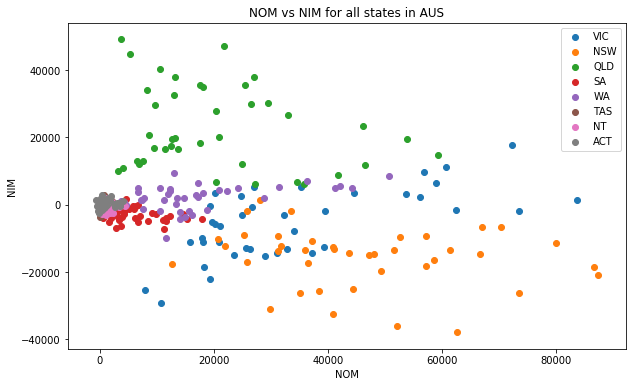

In [30]:
# NOM VS NIM for all

# Storing required data into the list
vicNom = nomNimDF['VIC_NOM'].tolist()
vicNim = nomNimDF['VIC_NIM'].tolist()

nswNom = nomNimDF['NSW_NOM'].tolist()
nswNim = nomNimDF['NSW_NIM'].tolist()

qldNom = nomNimDF['QLD_NOM'].tolist()
qldNim = nomNimDF['QLD_NIM'].tolist()

saNom = nomNimDF['SA_NOM'].tolist()
saNim = nomNimDF['SA_NIM'].tolist()

waNom = nomNimDF['WA_NOM'].tolist()
waNim = nomNimDF['WA_NIM'].tolist()

tasNom = nomNimDF['TAS_NOM'].tolist()
tasNim = nomNimDF['TAS_NIM'].tolist()

ntNom = nomNimDF['NT_NOM'].tolist()
ntNim = nomNimDF['NT_NIM'].tolist()

actNom = nomNimDF['ACT_NOM'].tolist()
actNim = nomNimDF['ACT_NIM'].tolist()


# Setting figure size
plt.figure(figsize = [10,6])

# Plotting the graph
plt.scatter(vicNom, vicNim, label = 'VIC', color = 'C0')
plt.scatter(nswNom, nswNim, label = 'NSW', color = 'C1')
plt.scatter(qldNom, qldNim, label = 'QLD', color = 'C2')
plt.scatter(saNom, saNim, label = 'SA', color = 'C3')
plt.scatter(waNom, waNim, label = 'WA', color = 'C4')
plt.scatter(tasNom, tasNim, label = 'TAS', color = 'C5')
plt.scatter(ntNom, ntNim, label = 'NT', color = 'C6')
plt.scatter(actNom, actNim, label = 'ACT', color = 'C7')

plt.xlabel('NOM')
plt.ylabel('NIM')
plt.title('NOM vs NIM for all states in AUS')
plt.legend()
plt.show()

**Ans :** The above graph displays the NOM vs NIM for various states in Australia. Although each state's plot is independent, nothing can be deduced in particular as there's no fixed trend. We see that the data points for QLD, NSW and VIC are spread out compared to other states.

### A2.2.c. Try selecting and plotting the data for Victoria only using scatter plot. Can you see arelationship now? If so, explain the relationship.

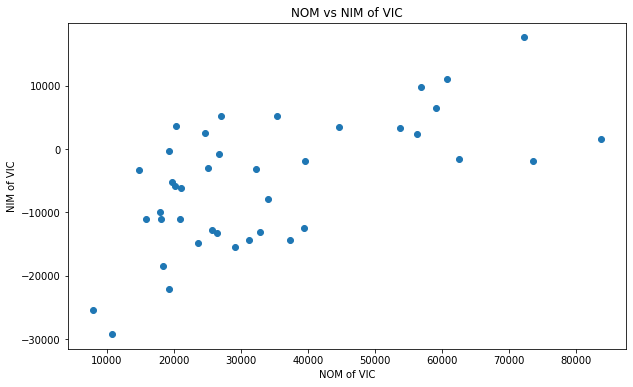

In [32]:
# VICNOM vs VICNIM

# Storing required data into the list
vicNom = nomNimDF['VIC_NOM'].tolist()
vicNim = nomNimDF['VIC_NIM'].tolist()
yearList = nomNimDF.Year.tolist()

# Setting figure size
plt.figure(figsize = [10,6])

# Plotting the graph
plt.scatter(vicNom, vicNim)
plt.xlabel('NOM of VIC')
plt.ylabel('NIM of VIC')
plt.title('NOM vs NIM of VIC')
plt.show()

**Ans :** Above graph shows NOM vs NIM for Victoria state. Since this plot is not with respect to time as such year, we cannot conclude on the relation between NOM and NIM. However, we can see in the first half of the graph that more number of people left Victoria than the number of people who stayed back whereas in the second half of the graph, we can see gain in the net population in Victoria as the data points are above 0.

### A2.2.d. Finally, plot the Net Interstate Migration (NIM) for Queensland and New South Wales overdifferent years. Note graphs for both QLD and NSW should be on the same plot. Compare the plots for these two states. What can you infer from the trend you see for these two states?

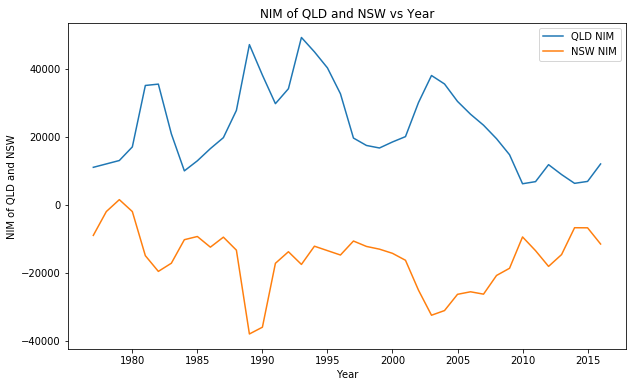

In [33]:
# NIM of QLD and NSW vs Year

# Storing required data into the list
qldNim = nomNimDF['QLD_NIM'].tolist()
nswNim = nomNimDF['NSW_NIM'].tolist()
yearList = nomNimDF.Year.tolist()

# Setting figure size
plt.figure(figsize = [10,6])

# Plotting the graph
plt.plot(yearList, qldNim, label = 'QLD NIM')
plt.plot(yearList, nswNim, label = 'NSW NIM', color = 'C1')
plt.xlabel('Year')
plt.ylabel('NIM of QLD and NSW')
plt.title('NIM of QLD and NSW vs Year')
plt.legend()
plt.show()

**Ans :** The above graph depicts the trend for NIM of QLD and NSW over the years 1977 to 2016. We can deduce from the graph that the trend of QLD is on the higher side compared to that of NSW.

We can see NIM for QLD is generally above 0 implying that there were more number of people who came into QLD compared to the number of people who left QLD. Hence the trend for NIM of QLD can be considered as gain in the population.

For NSW, it is evident that the number of people who left NSW is more than the number of people who came into NSW. So, the trend for NIM of NSW can be considered as loss in population as it is in negative.

## A3. Visualising the Relationship over Time

### A3.1. Use Python to build a Motion Chart, that compares the role migration (overseas and interstate)plays towards population growth in each Australia state/territory over time. The motion chart shouldshow the Net Overseas Migration (NOM) on the x-axis, the Net Interstate Migration (NIM) on they-axis, and the bubble size should show the Total Population Growth.

The following html code block is just to make sure that you will see the entire motion chart nicely in the output cell.

In [34]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [35]:
# Melting the original dataframe to plot motion chart

# Births
birthsModified =  pd.melt(birthsReport, id_vars =['Year'], value_vars =['NSW', 'ACT', 'QLD', 'SA', 'WA','TAS', 'VIC', 'NT']) 
birthsModified = birthsModified.rename(columns={'variable': 'States','value': 'Birth'})

# Deaths
deathsModified =  pd.melt(deathsReport, id_vars =['Year'], value_vars =['NSW', 'VIC', 'QLD', 'SA', 'WA','TAS', 'NT', 'ACT']) 
deathsModified = deathsModified.rename(columns={'variable': 'States','value': 'Death'})

# TFR
tfrModified =  pd.melt(tfrReport, id_vars =['Year'], value_vars =['NSW', 'VIC', 'QLD', 'SA', 'WA','TAS', 'NT', 'ACT']) 
tfrModified = tfrModified.rename(columns={'variable': 'States','value': 'TFR'})

# NOM
nomModified =  pd.melt(nomReport, id_vars =['Year'], value_vars =['NSW', 'VIC', 'QLD', 'SA', 'WA','TAS', 'NT', 'ACT']) 
nomModified = nomModified.rename(columns={'variable': 'States','value': 'NOM'})

# NIM
nimModified =  pd.melt(nimReport, id_vars =['Year'], value_vars =['NSW', 'VIC', 'QLD', 'SA', 'WA','TAS', 'NT', 'ACT']) 
nimModified = nimModified.rename(columns={'variable': 'States','value': 'NIM'})

In [36]:
# Merging the above melted dataframes into one single dataframe as asked in the question

# Births and Deaths
birthsDeathsDF = pd.merge(birthsModified, deathsModified, how='inner', on = ['Year', 'States'])

# Births, Deaths and TFR
birthsDeathsTfrDF = pd.merge(birthsDeathsDF, tfrModified, how='right', on = ['Year', 'States'])

# Births,Deaths, TFR and NOM
birthsDeathsTfrNomDF = pd.merge(birthsDeathsTfrDF, nomModified, how='left', on = ['Year', 'States'])

# Births, Deaths, TFR, NOM and NIM
mergedDF = pd.merge(birthsDeathsTfrNomDF, nimModified, how='left', on = ['Year', 'States'])

In [37]:
# Filling null values 
mergedDF = mergedDF.fillna(0)

# Sorting based on year
mergedDF = mergedDF.sort_values(by=['Year'], ascending=True)

# Resetting the index
mergedDF = mergedDF.reset_index(drop=True)

In [38]:
# Creating a new column named Population and storing data into it 
mergedDF['Population'] = mergedDF.apply(lambda row: row.Birth + row.NOM + row.NIM - row.Death, axis=1)
mergedDF.head()

,Year,States,Birth,Death,TFR,NOM,NIM,Population
0,1971,VIC,0.0,0.0,2.858,0.0,0.0,0.0
1,1971,TAS,0.0,0.0,2.903,0.0,0.0,0.0
2,1971,QLD,0.0,0.0,3.025,0.0,0.0,0.0
3,1971,ACT,0.0,0.0,2.908,0.0,0.0,0.0
4,1971,WA,0.0,0.0,3.047,0.0,0.0,0.0


In [39]:
# Plotting the motion chart
mChart = MotionChart(df = mergedDF, key='Year', x='NOM', y='NIM', xscale='linear', yscale='linear',
                     size='Population', color='States', category='States')

mChart.to_notebook()

### A3.2.a. Comment generally on the trend you see in Net Overseas Migration (NOM) and NetInterstate Migration (NIM) overtime. Is there any relationship between the two variables?

**Ans :** There is no particular trend that can be seen in the motion chart above except that after every year or two, NOM/NIM increase and then drop down to 0. NIM indicates net gain or loss in the population due to interstate migration whereas NOM indicates net gain or loss in the population due to overseas migration. Whenever these values increase, there is a net gain in the population and whenever these values decrease, there is a loss in the population. We can conclude from the above chart that whenever there is a growth in the NOM or NIM for a particular state, the overal population also increases and similarly it has reverse effect on population when NOM or NIM decreases.

### A3.2.b. Select VIC and NSW for this question: In which year(s) does VIC have a higher NetOverseas Migration (NOM) than NSW.

**Ans :** We can see that there's only one year where VIC had higher NOM compared to that of NSW and the year is 2006. Snapshot is present in the PDF report.

In [40]:
# Code to show that only in the year 2016 NOM of VIC was more than NOM of NSW 
filt = (nomReport['VIC'] > nomReport['NSW'])
nomReport[filt]

,Year,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
29,2006,38523,39561,32952,9813,22355,1166,1891,501


### A3.2.c. Which state has the highest Net Interstate Migration most of the years (for the period 1977 to 2016)?

**Ans :** From the above motion chart, we can deduce that QLD has the highest NIM for most of the years for the period 1977 to 2016. Since it is spread over multiple years, we cannot show it through snapshots.

# Task B: Exploratory Analysis of Data

## B1. Daily number of crimes

In [41]:
# Storing the location of the required files
crime = 'C:/Users/veruv/Data Science Jupyter Notebook/Assignments/Intro to Data Science/Assignment 1/Datasets-20190825/Datasets/Task B/Crime_Statistics_SA_2014_2019.csv'

In [42]:
# Read births.csv file using pandas
crimeReport = pd.read_csv(crime)

### B1.1. For each suburb, calculate the number of days that at least 15 crimes have occurred per day.

In [43]:
# Fetching suburbs per days where min crime count was 15
dailyCrimes = crimeReport.groupby(['Suburb - Incident', 'Reported Date'])['Offence Count'].sum()[lambda x : x >= 15].reset_index()
dailyCrimes = dailyCrimes.groupby(['Suburb - Incident'])['Reported Date'].count().reset_index()
dailyCrimes = dailyCrimes.rename(columns={'Reported Date': 'Number Of Days'})
suburbList = dailyCrimes['Suburb - Incident'].tolist()
dailyCrimes = dailyCrimes.sort_values(by=['Number Of Days'], ascending = False)
dailyCrimes = dailyCrimes[dailyCrimes['Suburb - Incident'].isin(suburbList)]
dailyCrimes = dailyCrimes.reset_index(drop=True)

# In order to display the suburbs with days count as 0:

# Initializing empty lists to store suburbs and days count
suburbs = []
days = []

# fetching required data and storing in form of a list
suburbList = crimeReport['Suburb - Incident'].unique().tolist()
dailyCrimesSuburbs = dailyCrimes['Suburb - Incident'].tolist()
crimeDays = dailyCrimes['Number Of Days'].tolist()

# Inserting suburbs data from previous dataframe
for i in range(len(dailyCrimesSuburbs)):
    suburbs.append(dailyCrimesSuburbs[i])

#  Inserting days data from previous dataframe
for i in range(len(dailyCrimesSuburbs)):
    days.append(crimeDays[i])
    
# Inserting suburbs and days count of the suburbs which weren't in previous dataframe     
for element in suburbList:
    if element not in suburbs:
        suburbs.append(element)
        days.append(0)

# Inserting data to the dataframe and displaying it        
dailyCrimes = pd.DataFrame(columns=['Suburbs', 'Days'])    
dailyCrimes['Suburbs'] = (suburbs)
dailyCrimes['Days']= (days)
dailyCrimes.head(30)

,Suburbs,Days
0,ADELAIDE,877
1,PORT LINCOLN,5
2,NOT DISCLOSED,5
3,MURRAY BRIDGE,5
4,PORT AUGUSTA,4
5,MORPHETT VALE,3
6,OAKLANDS PARK,3
7,MOUNT GAMBIER,3
8,PROSPECT,2
9,MODBURY,1


**Ans :** The above code result displays all the suburbs in the dataset with the number of days where atleast 15 crimes have occurred. There are about 1,600 suburbs in the dataset and except 21 suburbs, rest of them have 0 days where crime count was greater than 15.

### B1.2. Now which suburbs do have at least one day where the daily number of crimes are more than 15. (As per forum discussion, question was changed to find suburbs which have one day where daily number of crimes are more than or equal to 15)

In [44]:
dailyCrimes = crimeReport.groupby(['Suburb - Incident', 'Reported Date'])['Offence Count'].sum()[lambda x : x >= 15].reset_index()
dailyCrimes = dailyCrimes.groupby(['Suburb - Incident'])['Reported Date'].count().reset_index()
dailyCrimes = pd.DataFrame(dailyCrimes['Suburb - Incident'])
dailyCrimes

,Suburb - Incident
0,ADELAIDE
1,ASCOT PARK
2,DAVOREN PARK
3,FINDON
4,GLENELG
5,LOXTON
6,MARLESTON
7,MODBURY
8,MORPHETT VALE
9,MOUNT BARKER


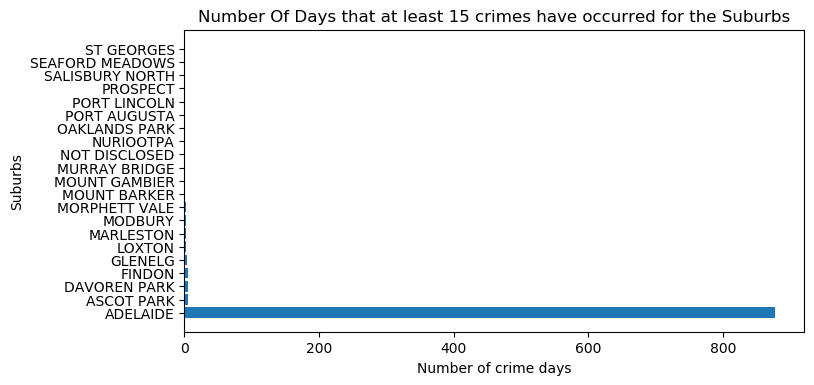

In [45]:
# Fetching required data
dailyCrimes = crimeReport.groupby(['Suburb - Incident', 'Reported Date'])['Offence Count'].sum()[lambda x : x >= 15].reset_index()
dailyCrimes = dailyCrimes.groupby(['Suburb - Incident'])['Reported Date'].count().reset_index()
dailyCrimes = dailyCrimes.rename(columns={'Reported Date': 'Number Of Days'})
suburbList = dailyCrimes['Suburb - Incident'].tolist()
dailyCrimes = dailyCrimes.sort_values(by=['Number Of Days'], ascending = False)
dailyCrimes = dailyCrimes[dailyCrimes['Suburb - Incident'].isin(suburbList)]
dailyCrimes = dailyCrimes.reset_index(drop=True)

numberOfCrimeDays = dailyCrimes['Number Of Days'].tolist()

# Define the figure size
plt.figure(figsize=[8,4], dpi=100)

# Plotting the graph
plt.barh(suburbList, numberOfCrimeDays)
plt.xlabel('Number of crime days')
plt.ylabel('Suburbs')
plt.title('Number Of Days that at least 15 crimes have occurred for the Suburbs')
plt.show()

### B1.3. Use an appropriate graph to visualize and detect outliers (extreme values) on the data from step2 and remove them. Then, plot the data again using a bar graph.

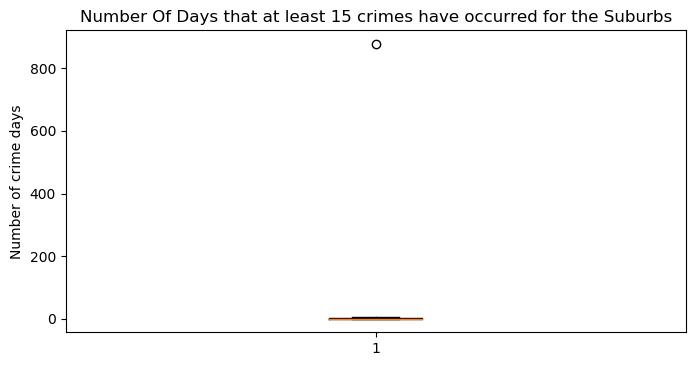

In [46]:
# Fetching required data
numberOfCrimeDays = dailyCrimes['Number Of Days'].tolist()

# Define the figure size
plt.figure(figsize=[8,4], dpi=100)

# Plotting the graph
plt.boxplot(numberOfCrimeDays)
plt.xlabel('')
plt.ylabel('Number of crime days')
plt.title('Number Of Days that at least 15 crimes have occurred for the Suburbs')
plt.show()

We can see in above boxplot that there's an outlier above 800 and this can be removed (shown below).

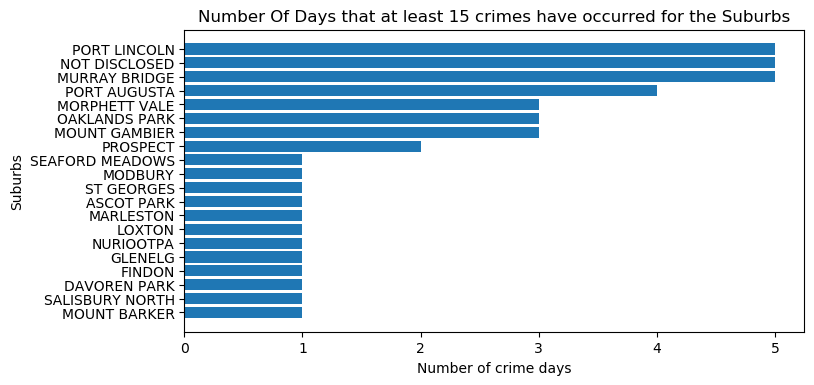

In [47]:
# Removing outlier
filt = dailyCrimes['Number Of Days'] < 800
dailyCrimes = dailyCrimes[filt]
dailyCrimes = dailyCrimes.sort_values('Number Of Days', ascending=True)

# Fetching required data
numberOfCrimeDays = dailyCrimes['Number Of Days'].tolist()
suburbList = dailyCrimes['Suburb - Incident'].unique().tolist()

# Define the figure size
plt.figure(figsize=[8,4], dpi=100)

# Plotting the graph
plt.barh(suburbList, numberOfCrimeDays)
plt.xlabel('Number of crime days')
plt.ylabel('Suburbs')
plt.title('Number Of Days that at least 15 crimes have occurred for the Suburbs')
plt.show()

###  B1.4. Compare the bar graphs in step 2 and 3. Which bar graph is easier to interpret? Why?

**Ans :** The first bar graph had a very high value of daily crimes which dominated other crime count values and hence it was difficult to identify the ranking of the other suburbs based on daily crimes. After removing the outlier (suburb with huge daily crime count), we can clearly understand the data as shown in the above graph. Hence, the bar graph in step 3 is easier to understand.

Along with all other suburbs, we can observe from the above dataframes and graphs that there is an undisclosed suburb named as _'NOT DISCLOSED'_ . It doesn't gives any information about the suburb, however, does has crime count more than 15 per day. We can investigate further about these undisclosed crimes or can remove from our analysis depending on the situation and requirement.

## B2. Challenge: Identify mistakes in data entry

### B2.1 Identify the data entry errors and provide possible solutions.

**Ans :** There's an error in the data entry for the column 'Offence Level 3 Description'. There are two entities with same name but with a change in one letter - 'Assault Police' and 'Assault police' - Both are one and the same within a column but would be treated as different entities due to difference in the case of the letter 'p'. As for the possible solutions, we can change the small case letter 'p' to 'P' or upper case letter 'P' to 'p'. In all, we need to update few rows in the dataframe.

In addition to the above, there are few nulls in the 'Suburb - Incident' and 'Postcode - Incident' which need to be handled. Also as stated in the previous step, we've 'NOT DISCLOSED' entry in the suburbs and postcode column.

### B2.2 Use Python to fix the errors.

In [48]:
crimeReport['Offence Level 3 Description'].unique()

array(['Other property damage and environmental', 'Other theft',
       'Assault Police', 'Common Assault',
       'Serious Assault not resulting in injury',
       'Serious Assault resulting in injury', 'Non-aggravated robbery',
       'Non-aggravated sexual assault', 'Threatening behaviour',
       'Graffiti', 'Property damage by fire or explosion',
       'Dangerous or negligent acts', 'SCT - Residence',
       'Theft/Illegal Use of MV', 'Theft from motor vehicle',
       'SCT - Non Residence', 'Abduction, harassment and other offences',
       'Theft from shop', 'Other fraud, deception and related offences',
       'Other acts intended to cause injury',
       'Receive or handle proceeds of crime', 'Aggravated robbery',
       'Non-assaultive sexual offences', 'Obtain benefit by deception',
       'Aggravated sexual assault', 'Blackmail and extortion',
       'Other homicide and related offences', 'Murder',
       'Other unlawful entry with intent', 'Assault police'], dtype=object)

In [49]:
# Replacing 'Assault police' with 'Assault Police'
crimeReport.loc[crimeReport['Offence Level 3 Description'] == 'Assault police', 'Offence Level 3 Description'] = 'Assault Police'
crimeReport['Offence Level 3 Description'].unique()

array(['Other property damage and environmental', 'Other theft',
       'Assault Police', 'Common Assault',
       'Serious Assault not resulting in injury',
       'Serious Assault resulting in injury', 'Non-aggravated robbery',
       'Non-aggravated sexual assault', 'Threatening behaviour',
       'Graffiti', 'Property damage by fire or explosion',
       'Dangerous or negligent acts', 'SCT - Residence',
       'Theft/Illegal Use of MV', 'Theft from motor vehicle',
       'SCT - Non Residence', 'Abduction, harassment and other offences',
       'Theft from shop', 'Other fraud, deception and related offences',
       'Other acts intended to cause injury',
       'Receive or handle proceeds of crime', 'Aggravated robbery',
       'Non-assaultive sexual offences', 'Obtain benefit by deception',
       'Aggravated sexual assault', 'Blackmail and extortion',
       'Other homicide and related offences', 'Murder',
       'Other unlawful entry with intent'], dtype=object)

Here, I've updated the 'Offence Level 3 Description' column - All the entries with 'Assault police' are replaced with 'Assault Police'. The above code displays the unique column data after the change has been implemented. We can see that there is only one 'Assault Police' entry unlike the previous code result.

In [50]:
# Filtering out the data that have 'Suburb - Incident' as 'NOT DISCLOSED'
filt = (crimeReport['Suburb - Incident'] != 'NOT DISCLOSED')
crimeReportModified = crimeReport[filt]
crimeReportModified.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence Count
0,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,4.0
1,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,8.0
2,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Assault Police,2.0
3,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,2.0
4,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,4.0


In [51]:
# Checking if 'NOT DISCLOSED' columns are still present
filt = (crimeReportModified['Suburb - Incident'] == 'NOT DISCLOSED')
crimeReportModified[filt].head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence Count


In [52]:
#  Checking for nulls
crimeReportModified.isnull().sum()

Reported Date                    0
Suburb - Incident              159
Postcode - Incident            403
Offence Level 1 Description      0
Offence Level 2 Description      0
Offence Level 3 Description      0
Offence Count                    0
dtype: int64

In [53]:
# Removing the nulls and checking again
crimeReportModified = crimeReportModified.dropna()
crimeReportModified.isnull().sum()

Reported Date                  0
Suburb - Incident              0
Postcode - Incident            0
Offence Level 1 Description    0
Offence Level 2 Description    0
Offence Level 3 Description    0
Offence Count                  0
dtype: int64

**Ans :** Here we can notice the nulls in our dataframe. Removing these nulls or handling them won't solve anything as these nulls don't pop up in the analysis. However, knowing the actual data instead of the nulls would help in our analysis in finding out suburbs with more than 15 crimes per day. If we are to remove the nulls, we can do so by dropna command.

### B2.3. Argue how your answers to part B1 might be changed after fixing the errors.

**Ans :** 
The data entry error that was fixed under 'Offence Level 3 Description' column, has no impact on the analysis above as we are not doing any operations on that column.

I've filtered out the suburb column which had 'NOT DISCLOSED' as an entry. Since 'Postcode - Incident' column has 'NOT DISCLOSED where ever 'Suburb - Incident' was 'NOT DISCLOSED', the issue has been handled. This, however, has an impact on our analysis as one of the data points in our graph would be removed which doesn't really gives us any information about the suburbs or offence count in our analysis in finding suburbs which have atleast 15 crime count per day.

As mentioned earlier, there were few nulls in our dataframe which can't be used in our analysis. Knowing those values for nulls would help us analyse in a better way. For instance, if all the nulls belong to a suburb named 'LOXTON', then it's crime count as well as number of days where crime count was greater than 15, both would increase dramatically. So it does affects our data.

# Task C: Exploratory Analysis on Other Data

In [54]:
# Storing the location of the required files
soccer = 'C:/Users/veruv/Data Science Jupyter Notebook/Assignments/Intro to Data Science/Assignment 1/Datasets-20190825/Datasets/Task C/soccer.csv'

In [55]:
# Read soccer.csv file using pandas
soccerReport = pd.read_csv(soccer)
soccerReport.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


**Explanation :**

The dataset I've picked is regarding International football results from 1872 to 2019. This data set is in the form of a csv file named 'results.csv' which I've renamed to 'soccer.csv' keeping the data intact without changing the original data. I've selected this dataset from https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017. 

This dataset includes 40,838 results of international football matches starting from the very first official match in 1972 up to 2019. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

soccer.csv includes the following columns:

date - date of the match
home_team - the name of the home team
away_team - the name of the away team
home_score - full-time home team score including extra time, not including penalty-shootouts
away_score - full-time away team score including extra time, not including penalty-shootouts
tournament - the name of the tournament
city - the name of the city/town/administrative unit where the match was played
country - the name of the country where the match was played
neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

### C1. Displaying the total number of rows in the csv file

In [56]:
# Display total number of rows in the csv file
print('Total number of rows in the soccer.csv file : ', len(soccerReport.index))

Total number of rows in the soccer.csv file :  40839


### C2. Displaying number of nulls in the csv file

In [57]:
# Displaying total number of nulls per column 
print('Total number of nulls in the soccer.csv file : ')
print(soccerReport.isnull().sum())

Total number of nulls in the soccer.csv file : 
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


**Explanation :**

The above result implies that there are no nulls in the csv file.

### C3. Finding out the minimum and maximum year from the csv file

In [58]:
# Display min and max years
df1 = pd.to_datetime(soccerReport['date']).reset_index()
print('Minimum year :', df1['date'].dt.year.min())
print('Maximum year : ', df1['date'].dt.year.max())

Minimum year : 1872
Maximum year :  2019


### C4. Displaying the top 10 countries which have hosted the tournaments most number of times

In [59]:
# Top 10 countries which hosted the tournament most number of times
soccerCountryCount = pd.DataFrame(soccerReport.country.value_counts()).reset_index()
soccerCountryCount = soccerCountryCount.rename(columns={'index': 'Country','country': 'Number Of Times Country Hosted Tournaments'})
soccerCountryCount.head(10)

,Country,Number Of Times Country Hosted Tournaments
0,United States,1144
1,France,801
2,England,687
3,Malaysia,644
4,Sweden,637
5,Germany,581
6,Brazil,529
7,Spain,517
8,Thailand,483
9,Italy,480


**Explanation :**

We can see from the code result that United States has hosted most number of tournaments (1144) followed by France (801) and then England (687). Below is a bar plot of the above data.

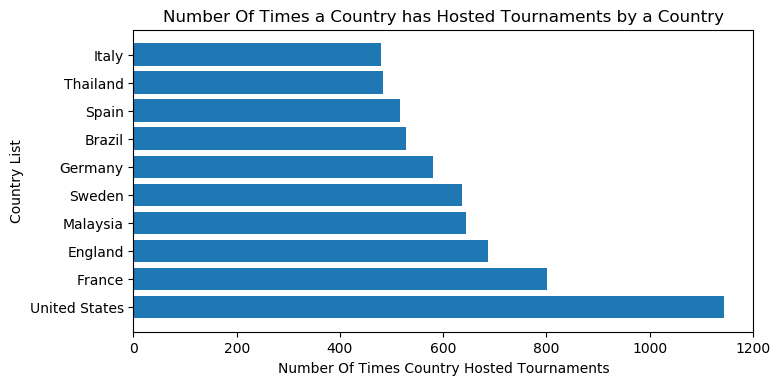

In [60]:
# Plotting bar graph for above data (Number of times a country has hosted tournaments)

# Fetching required data
countryList = soccerCountryCount['Country'].head(10).tolist()
tournaments = soccerCountryCount['Number Of Times Country Hosted Tournaments'].head(10).tolist()

# Define the figure size
plt.figure(figsize=[8,4], dpi=100)

# Plotting the graph
plt.barh(countryList, tournaments)
plt.ylabel('Country List')
plt.xlabel('Number Of Times Country Hosted Tournaments')
plt.title('Number Of Times a Country has Hosted Tournaments by a Country')
plt.show()

### C5. Finding out number of tournaments held per year

In [61]:
# Number of tournaments per year
soccerTournament = soccerReport.groupby(pd.to_datetime(soccerReport['date']).dt.year)['tournament'].count()[lambda x : x >= 500].reset_index()
soccerTournament = soccerTournament.sort_values(by=['date']).reset_index(drop=True)
soccerTournament

,date,tournament
0,1984,536
1,1985,571
2,1988,545
3,1989,590
4,1992,580
5,1993,733
6,1994,569
7,1995,641
8,1996,829
9,1997,863


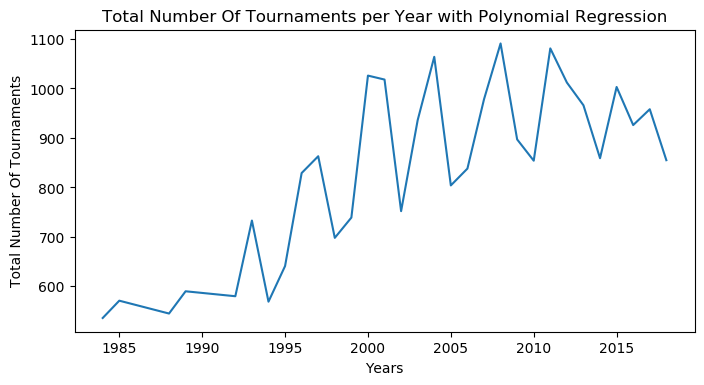

In [62]:
# Plotting simple line graph
# Fetching required data 

yearList = soccerTournament['date']
tournamentCount = soccerTournament['tournament']

# Define the figure size
plt.figure(figsize=[8,4], dpi=100)

#plotting
plt.plot(yearList,tournamentCount)
plt.ylabel('Total Number Of Tournaments')
plt.xlabel('Years')
plt.title('Total Number Of Tournaments per Year with Polynomial Regression')
plt.show()

**Explanation :**

The above graph depicts line plot for total number of tournaments held per year. The trend that follows here is of increasing sinusoidal wave - the curve keeps increasing and decreasing alternatively after every few years. The tournaments count started off from mid 500s when the first football game was played and ended upto close to 900 by the year 2018 with dramatic ups and downs.

### C5.1. Fitting polynomial regression with degree 2 for total number of tournaments held per year

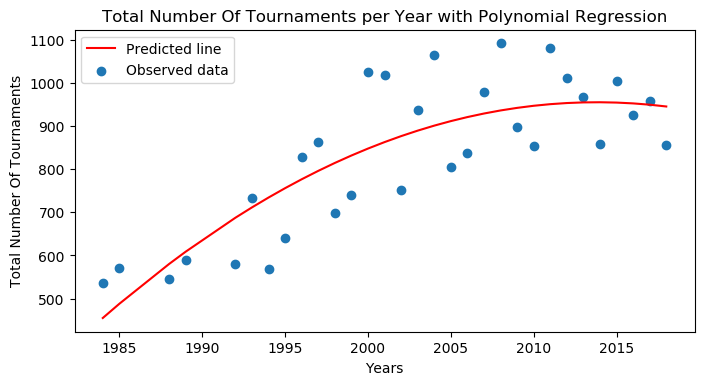

In [63]:
# Polynomial Regression with degree 2
# Fetching required data 

yearList = np.array(soccerTournament['date']).reshape(-1, 1)
tournamentCount = np.array(soccerTournament['tournament']).reshape(-1, 1)

# Logic for polynomial fit
poly = PolynomialFeatures(degree=2, include_bias=False) #the bias is avoiding the need to intercept
yearListCoeff = poly.fit_transform(yearList)
new_model = LinearRegression()
new_model.fit(yearListCoeff,tournamentCount)
tournamentCountPrediction = new_model.predict(yearListCoeff)

# Define the figure size
plt.figure(figsize=[8,4], dpi=100)

#plotting

plt.scatter(yearList,tournamentCount)
plt.plot(yearListCoeff[:,0], tournamentCountPrediction, 'r')
plt.ylabel('Total Number Of Tournaments')
plt.xlabel('Years')
plt.title('Total Number Of Tournaments per Year with Polynomial Regression')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

### C5.1.1. Predicting the total number of tournaments for years 2040 and 2050 with the regression fit above

In [64]:
# Predicting total number of tournaments for years 2040 and 2050
# Degree 2

poly = PolynomialFeatures(degree=2, include_bias=False) #the bias is avoiding the need to intercept
yearListCoeff = poly.fit_transform(yearList)
new_model = LinearRegression()
new_model.fit(yearListCoeff,tournamentCount)
tournamentCountPrediction = new_model.predict(yearListCoeff)


yearListCoeff = poly.fit_transform([[2040],[2050]])
tournamentCountPredictionPerYear = new_model.predict(yearListCoeff)
print('The predicted total number of tournaments for the year 2040 : ', m.floor(tournamentCountPredictionPerYear[0][0]))
print('The predicted total number of tournaments for the year 2050 : ', m.floor(tournamentCountPredictionPerYear[1][0]))

The predicted total number of tournaments for the year 2040 :  569
The predicted total number of tournaments for the year 2050 :  219


### C5.2. Fitting linear regression for the data above

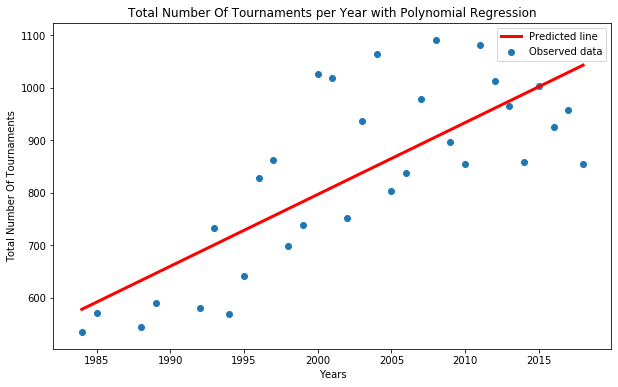

In [65]:
# Linear Regression fit

# Fetching required data 
yearList = soccerTournament['date'].tolist()
tournamentCount = soccerTournament['tournament'].tolist()

# Setting figure size
plt.figure(figsize = [10,6])

slope, intercept, r_value, p_value, std_err = linregress(yearList, tournamentCount)

tournamentCountPredictionPerYear = [slope*xi + intercept for xi in yearList]

# Plotting the graph
plt.plot(yearList,tournamentCountPredictionPerYear,'r-', linewidth=3)
plt.scatter(yearList,tournamentCount)
plt.ylabel('Total Number Of Tournaments')
plt.xlabel('Years')
plt.title('Total Number Of Tournaments per Year with Polynomial Regression')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

### C5.2.1. Predicting the total number of tournaments for years 2040 and 2050 with the regression fit above

In [66]:
# Predicting total number of tournaments for years 2040 and 2050

# We use a standard scipy package: 
slope, intercept, r_value, p_value, std_err = linregress(yearList, tournamentCount)
# Here's our function:
tournamentCountPredictionPerYear = [slope*xi + intercept for xi in [2040, 2050]]
print('The predicted total number of tournaments for the year 2040 : ', m.floor(tournamentCountPredictionPerYear[0]))
print('The predicted total number of tournaments for the year 2050 : ', m.floor(tournamentCountPredictionPerYear[1]))

The predicted total number of tournaments for the year 2040 :  1343
The predicted total number of tournaments for the year 2050 :  1480


### C5.3. Fitting polynomial regression with degree 3 for above data

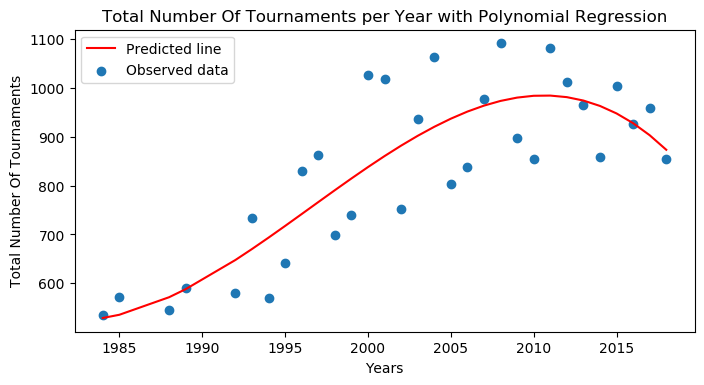

In [67]:
# Polynomial Regression with degree 3
# Fetching required data 

yearList = np.array(soccerTournament['date']).reshape(-1, 1)
tournamentCount = np.array(soccerTournament['tournament']).reshape(-1, 1)

# Logic for polynomial fit
poly = PolynomialFeatures(degree=3, include_bias=False) #the bias is avoiding the need to intercept
yearListCoeff = poly.fit_transform(yearList)
new_model = LinearRegression()
new_model.fit(yearListCoeff,tournamentCount)
tournamentCountPrediction = new_model.predict(yearListCoeff)

# Define the figure size
plt.figure(figsize=[8,4], dpi=100)

#plotting

plt.scatter(yearList,tournamentCount)
plt.plot(yearListCoeff[:,0], tournamentCountPrediction, 'r')
plt.ylabel('Total Number Of Tournaments')
plt.xlabel('Years')
plt.title('Total Number Of Tournaments per Year with Polynomial Regression')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

### C5.3.1. Predicting the total number of tournaments for years 2040 and 2050 with the regression fit above

In [68]:
# Predicting total number of tournaments for years 2040 and 2050
# Degree 3

poly = PolynomialFeatures(degree=3, include_bias=False) #the bias is avoiding the need to intercept
yearListCoeff = poly.fit_transform(yearList)
new_model = LinearRegression()
new_model.fit(yearListCoeff,tournamentCount)
tournamentCountPrediction = new_model.predict(yearListCoeff)


yearListCoeff = poly.fit_transform([[2040],[2050]])
tournamentCountPredictionPerYear = new_model.predict(yearListCoeff)
print('The predicted total number of tournaments for the year 2040 : ', m.floor(tournamentCountPredictionPerYear[0][0]))
print('The predicted total number of tournaments for the year 2050 : ', m.floor(tournamentCountPredictionPerYear[1][0]))

The predicted total number of tournaments for the year 2040 :  -1558
The predicted total number of tournaments for the year 2050 :  -4220


**Explanation :**

From the above regression plots, we get an idea as for which curve fits our data points better. Since linear regression is nothing but polynomial regression with degree 1, we can say that our data points are tested against polynomial curve with degree 1, 2 and 3. Based on the predicted tournament count values for the years 2040 and 2050, we can conclude that polyfit with degree 2 works the best among all that we have tested. It gives us the realistic values compared to the fit with degree 3, which gives us negative values due to over fitting whereas linear fit has more variance (data points far away from predicted line) compared to variance of the polyfit with degree 2. Hence, linear fit and polyfit for degree 3 fails as polyfit with degree 2 is the best fit among all.

### C6. Finding out unique number of tournaments held per year

In [69]:
# Number of unique tournaments per year
soccerTournamentPerYear = soccerReport.groupby(pd.to_datetime(soccerReport['date']).dt.year)['tournament'].nunique()[lambda x : x >= 20].reset_index()
soccerTournamentPerYear

,date,tournament
0,1971,21
1,1976,26
2,1988,24
3,1992,20
4,1995,26
5,1996,23
6,1997,23
7,1998,24
8,1999,23
9,2000,26


### C7. Finding out the teams which have scored maximum number of (home as well as away) goals

In [70]:
# Top 10 teams which scored maximum home score
soccerHome = soccerReport.groupby(['home_team'])['home_score'].sum().reset_index()
soccerHome = soccerHome.sort_values(by = 'home_score', ascending = False).reset_index(drop = True)
soccerHome = soccerHome.rename(columns={'home_team':'team','home_score':'home_score'})
soccerHome.head(10)

,team,home_score
0,Brazil,1396
1,Germany,1231
2,Argentina,1200
3,Sweden,1129
4,England,1123
5,Hungary,1057
6,Mexico,1018
7,Netherlands,974
8,France,956
9,South Korea,921


In [71]:
# Top 10 teams which scored maximum away score
soccerAway = soccerReport.groupby(['away_team'])['away_score'].sum().reset_index()
soccerAway = soccerAway.sort_values(by = 'away_score', ascending = False).reset_index(drop = True)
soccerAway = soccerAway.rename(columns={'away_team':'team','away_score':'away_score'})
soccerAway.head(10)

,team,away_score
0,England,1046
1,Germany,873
2,Sweden,869
3,Hungary,825
4,Uruguay,769
5,Brazil,748
6,Netherlands,626
7,Poland,616
8,Argentina,616
9,Scotland,615


### C8. Finding out best team of all time

In [72]:
# Top 10 teams which have scored maximum overall 
soccerTeam = pd.merge(soccerHome, soccerAway, how = 'inner', on = 'team')
soccerTeam['total_score'] = soccerTeam.apply(lambda x: x['home_score'] + x['away_score'], axis=1)
soccerTeam = soccerTeam.sort_values('total_score', ascending = False).reset_index(drop=True)
soccerTeam.head(10)

,team,home_score,away_score,total_score
0,England,1123,1046,2169
1,Brazil,1396,748,2144
2,Germany,1231,873,2104
3,Sweden,1129,869,1998
4,Hungary,1057,825,1882
5,Argentina,1200,616,1816
6,Netherlands,974,626,1600
7,Mexico,1018,478,1496
8,South Korea,921,575,1496
9,France,956,524,1480


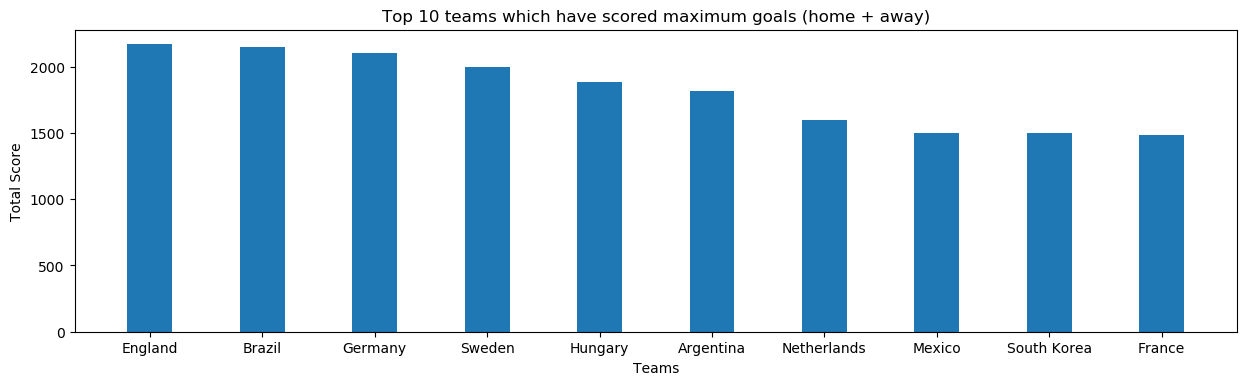

In [73]:
# Plotting bar graph for team vs score

# Fetching required data 

teamList = soccerTeam['team'].head(10)
totalScore = soccerTeam['total_score'].head(10)

# Define the figure size
plt.figure(figsize=[15,4], dpi=100)

#plotting
plt.bar(teamList,totalScore, width = .4)
plt.ylabel('Total Score')
plt.xlabel('Teams')
plt.title('Top 10 teams which have scored maximum goals (home + away)')
plt.show()

**Explanation :**
    
From the above graph, we can conclude that England is the best team which has scored most number of goals so far, followed by Brazil and Germany. All three teams have a close, neck-to-neck competition in terms of number of goals. The team which stands last in the top ten list is France which has scored about 1,500 goals.

### C9. Finding out number of times a particular tournament type was held

In [74]:
tournamentTypes = soccerReport['tournament'].value_counts().reset_index()
tournamentTypes = tournamentTypes.rename(columns={'index':'tournament type','tournament':'Number of times a tournament was held'})
tournamentTypes = tournamentTypes.sort_values('Number of times a tournament was held', ascending=False)
tournamentTypes.head()

,tournament type,Number of times a tournament was held
0,Friendly,16911
1,FIFA World Cup qualification,7100
2,UEFA Euro qualification,2432
3,African Cup of Nations qualification,1616
4,FIFA World Cup,900


### C9.1. Plotting a box plot to understand the concept of outliers

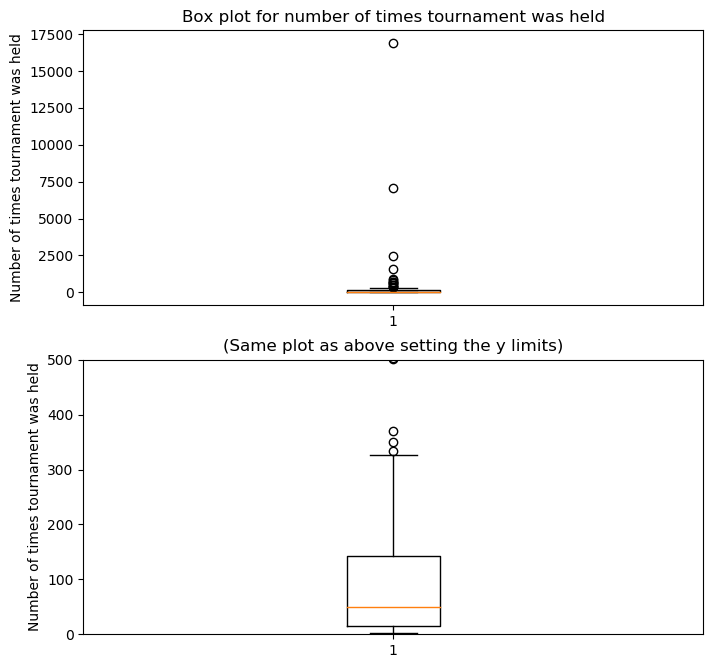

In [75]:
# Fetching required data
numberOfTournamentTypes = tournamentTypes['Number of times a tournament was held'].tolist()

# Define the figure size
plt.figure(figsize=[8,8], dpi=100)

# Plotting the graph
plt.subplot(211)
plt.boxplot(numberOfTournamentTypes)
plt.xlabel('')
plt.ylabel('Number of times tournament was held')
plt.title('Box plot for number of times tournament was held')

plt.subplot(212)
plt.boxplot(numberOfTournamentTypes)
plt.xlabel('')
plt.ylabel('Number of times tournament was held')
plt.title('(Same plot as above setting the y limits)')
plt.ylim(0,500)

plt.show()

**Explanation :**

From the above box plot, we can deduce that there are many outliers i.e data points far away from the regular data points (in this case, total number of tournament types that were held) after 350 on the y-axis.

### C10. Finding out countries that host the tournaments but don't play in any tournament

In [76]:
# Listing the countries that host the tournaments in a set
countryHostList = soccerReport['country'].tolist()
countryHostList = set(countryHostList)

# List of home teams, stored in a set
homeTeams = soccerReport['home_team'].tolist()
homeTeams = set(homeTeams)

# List of away teams, stored in a set
awayTeams = soccerReport['away_team'].tolist()
awayTeams = set(awayTeams)

# Combining home and away teams which represent a country into a single set
teams = homeTeams.union(awayTeams)

# Fetching out the countries that host tournaments but don't play
countryNoPlay = countryHostList-teams

# Displaying the result obtained
print("The countries that have hosted football tournaments but haven't played : ")
i=1
for element in countryNoPlay:
    print(i,'. ', element)
    i += 1

The countries that have hosted football tournaments but haven't played : 
1 .  Netherlands Guyana
2 .  British Guyana
3 .  Western Samoa
4 .  Zaïre
5 .  Éire
6 .  New Hebrides
7 .  Gold Coast
8 .  Soviet Union
9 .  Upper Volta
10 .  Ceylon
11 .  Serbia and Montenegro
12 .  Manchuria
13 .  Belgian Congo
14 .  Rhodesia
15 .  Netherlands Antilles
16 .  French Somaliland
17 .  Lautoka
18 .  Southern Rhodesia
19 .  Mali Federation
20 .  Yemen AR
21 .  Bohemia and Moravia
22 .  Dahomey
23 .  Vietnam DR
24 .  United Arab Republic
25 .  Malaya
26 .  Tanganyika
27 .  Nyasaland
28 .  French Polynesia
29 .  Northern Rhodesia
30 .  Irish Free State
31 .  Portuguese Guinea
32 .  Bohemia


**Explanation :**

As per the above result, we found out that there are 32 countries which host various football tournaments but don't play in those tournaments.

### C11. Finding number of Goals by Top 3 teams (England, Brazil and Germany per year (from 2005)) and plotting the same

In [77]:
# Fetching England home details
filtEnglandHome = (soccerReport['home_team'] == 'England')
soccerEnglandHome = pd.DataFrame(soccerReport[filtEnglandHome])
soccerEnglandHome = soccerEnglandHome[['date', 'home_team','home_score']]
soccerEnglandHome = soccerEnglandHome.rename(columns={'home_team':'team', 'home_score':'goals'})

# Fetching England away details
filtEnglandAway = (soccerReport['away_team'] == 'England')
soccerEnglandAway = soccerReport[filtEnglandAway]
soccerEnglandAway = soccerEnglandAway[['date', 'away_team','away_score']]
soccerEnglandAway = soccerEnglandAway.rename(columns={'away_team':'team', 'away_score':'goals'})

In [78]:
# Fetching Brazil home details
filtBrazilHome = (soccerReport['home_team'] == 'Brazil')
soccerBrazilHome = soccerReport[filtBrazilHome]
soccerBrazilHome = soccerBrazilHome[['date', 'home_team','home_score']]
soccerBrazilHome = soccerBrazilHome.rename(columns={'home_team':'team', 'home_score':'goals'})

# Fetching Brazil away details
filtBrazilAway = (soccerReport['away_team'] == 'Brazil')
soccerBrazilAway = soccerReport[filtBrazilAway]
soccerBrazilAway = soccerBrazilAway[['date', 'away_team','away_score']]
soccerBrazilAway = soccerBrazilAway.rename(columns={'away_team':'team', 'away_score':'goals'})

In [79]:
# Fetching Germany home details
filtGermanyHome = (soccerReport['home_team'] == 'Germany')
soccerGermanyHome = soccerReport[filtGermanyHome]
soccerGermanyHome = soccerGermanyHome[['date', 'home_team','home_score']]
soccerGermanyHome = soccerGermanyHome.rename(columns={'home_team':'team', 'home_score':'goals'})

# Fetching Germany away details
filtGermanyAway = (soccerReport['away_team'] == 'Germany')
soccerGermanyAway = soccerReport[filtGermanyAway]
soccerGermanyAway = soccerGermanyAway[['date', 'away_team','away_score']]
soccerGermanyAway = soccerGermanyAway.rename(columns={'away_team':'team', 'away_score':'goals'})

In [80]:
# Fetching England home and away details
soccerEnglandTeam = soccerEnglandHome.append(soccerEnglandAway)

# Fetching Brazil home and away details
soccerBrazilTeam = soccerBrazilHome.append(soccerBrazilAway)

# Fetching Germany home and away details
soccerGermanyTeam = soccerGermanyHome.append(soccerGermanyAway)

In [81]:
# Joining details of England, Brazil and Germany
soccerEnglandBrazilTeam = soccerEnglandTeam.append(soccerBrazilTeam)
soccerTeam = soccerEnglandBrazilTeam.append(soccerGermanyTeam)

In [82]:
# Pulling out only year from the date column and deleting the actual date column
soccerTeam['year'] = pd.to_datetime(soccerTeam['date']).dt.year.tolist()
soccerTeam = soccerTeam.drop(columns=['date'])

In [83]:
# As the data is too huge, filtering out the year from 2005
soccerTeam = soccerTeam[['year', 'team', 'goals']]
filtYear = (soccerTeam['year'] >= 2000)
soccerTeam = soccerTeam[filtYear]

# Resetting the index
soccerTeam = pd.DataFrame(soccerTeam.groupby(['year','team'])['goals'].sum()).reset_index()

In [84]:
# Splitting the data again based on teams to plot
filtEngland = (soccerTeam['team'] == 'England')
filtBrazil = (soccerTeam['team'] == 'Brazil')
filtGermany = (soccerTeam['team'] == 'Germany')

soccerEnglandTeam = soccerTeam[filtEngland]
soccerBrazilTeam = soccerTeam[filtBrazil]
soccerGermanyTeam = soccerTeam[filtGermany]

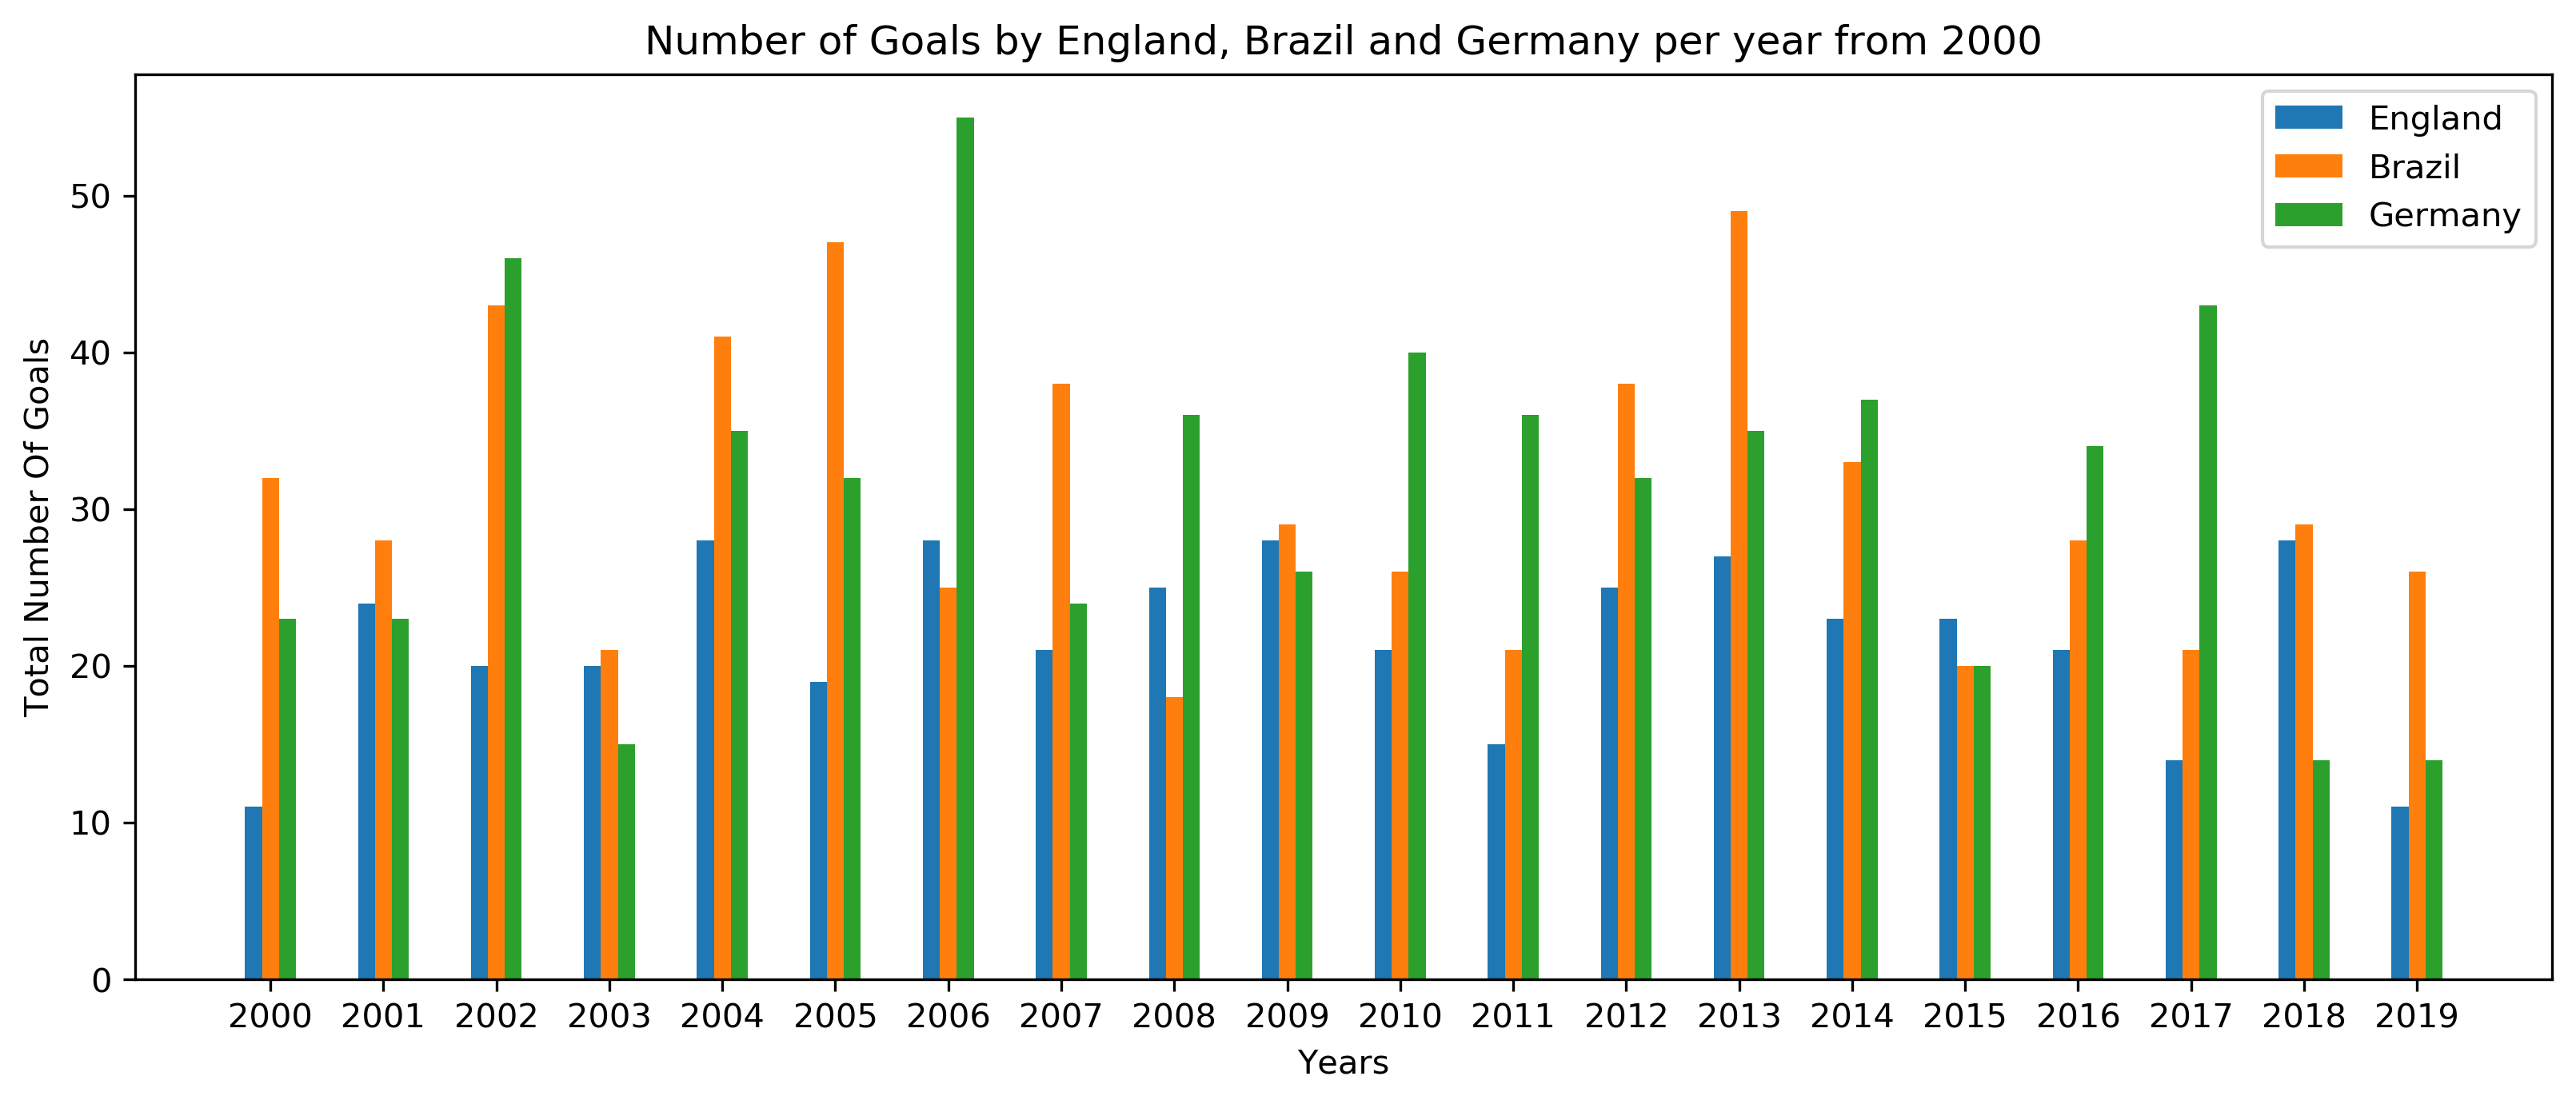

In [85]:
# Setting figure size
plt.figure(figsize=[13, 5], dpi=300)

# Setting width and indices
width = 0.15
indices = np.arange(20)
years = ['2000', '2001', '2002', '2003', '2004', '2005','2006','2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

# Plotting bar graphs
plt.bar(indices-1*width, soccerEnglandTeam['goals'], width, color='C0', label='England', align='center')
plt.bar(indices, soccerBrazilTeam['goals'], width, color='C1', label='Brazil', align='center')
plt.bar(indices+1*width, soccerGermanyTeam['goals'], width, color='C2', label='Germany', align='center')

plt.title("Number of Goals by England, Brazil and Germany per year from 2000")
plt.xlabel("Years")
plt.ylabel("Total Number Of Goals")
plt.xticks(indices, years)

plt.legend()
plt.show()

**Explanation :**

The above plot represents the number of goals by top 3 teams i.e. England, Brazil and Germany per year from 2000. Since the data set was too big to plot year wise, I've considered recent years and compared the performance of the teams. The number of goals scored by England is represented by blue color, goals scored by Brazil is shown by orange color and the goals scored by Germany is depicted by green color.

It is observed that Germany has scored the most number of goals(over 50  in the year 2006) during the period 2000-2019 whereas England has scored the least number of goals(just over 10 in the year 2000) during the same period.

From the graph above, we can see that although England was the best team in our previous analysis, in the recent times, they have scored very less goals compared to Brazil and Germany. It can deduced that Brazil has been consistent with their performance while Germany has shown a lot of variance from being top team (in terms of the number of goals they've scored per year) to the bottom team in the list of teams that we picked.

It can be concluded that it is a matter of few years that England will be overtaken by Brazil/Germany. It appears that Germany has been performing better than England and Brazil in terms of scoring most goals in the recent times while Brazil stands second.

### C12. Motion Chart for top 10 team's performance

In [121]:
# Fetching required fields from original dataframe
soccerModified = soccerReport
soccerModified['year'] = pd.to_datetime(soccerReport['date']).dt.year.tolist()
soccerModified = soccerModified.drop(columns=['date'])
soccerModified = soccerModified[['year', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament']]
soccerModified.head()

,year,home_team,away_team,home_score,away_score,tournament
0,1872,Scotland,England,0,0,Friendly
1,1873,England,Scotland,4,2,Friendly
2,1874,Scotland,England,2,1,Friendly
3,1875,England,Scotland,2,2,Friendly
4,1876,Scotland,England,3,0,Friendly


In [123]:
# Grouping home team details
soccerModifiedHome = soccerModified.groupby(['year', 'home_team']).agg({'tournament':'count', 'home_score': 'sum'}).reset_index()
soccerModifiedHome = soccerModifiedHome.rename(columns={'home_team':'team'})

# Grouping away team details
soccerModifiedAway = soccerModified.groupby(['year', 'away_team']).agg({'tournament':'count', 'away_score': 'sum'}).reset_index()
soccerModifiedAway = soccerModifiedAway.rename(columns={'away_team':'team'})

# Merging home and away team details based on year and team and then calculating total number of tournaments played by each team
soccerModifiedTeam = pd.merge(soccerModifiedHome, soccerModifiedAway, how='inner', on = ['year', 'team'])
soccerModifiedTeam['tournament'] = soccerModifiedTeam['tournament_x'] + soccerModifiedTeam['tournament_y']
soccerModifiedTeam = soccerModifiedTeam.drop(columns=['tournament_x', 'tournament_y'])

# Filtering for only top 10 teams
filt = (soccerModifiedTeam['team'].str.contains('England|Brazil|Germany|Sweden|Hungary|Argentina|Netherlands|Mexico|South Korea|France'))
soccerModifiedTeam = soccerModifiedTeam[filt]
soccerModifiedTeam.head()

,year,team,home_score,away_score,tournament
19,1888,England,5,10,3
61,1902,England,2,1,3
65,1903,Hungary,2,2,2
73,1905,France,1,0,2
74,1905,Netherlands,4,4,2


In [125]:
# Plotting the motion chart
mChart = MotionChart(df = soccerModifiedTeam, key='year', x='home_score', y='away_score', xscale='linear', yscale='linear',
                     size='tournament', color='team', category='team')

mChart.to_notebook()

**Explanation :**

The above motion chart describes the trend of top ten football team's performance in terms of home and away goals with respect to the number of tournaments played on a yearly basis. As analyzed earlier, we see that England, Brazil and Germany are the top three performers. It can also be seen that these three teams have played more number of games on a yearly basis compared to the other teams in the dataset. 

The whole year range can be split into sub ranges. From the above motion chat, we can see that in the early 1900s, Argentina dominated the most, followed by Hungary and Sweden. From early 1940s, Argentina, Brazil, England, Netherlands, Hungary and Sweden scored many goals as they played more number of tournaments. For a decade, 1970-1980 South Korea out performed other teams for most of the years. From 2000s, it was mostly Brazil, Germany, Sweden, England who dominated the most. Also, it is interesting to note that England hasn't scored as many goals as other teams on a yearly basis yet it stands as one of the top three teams.

However, we can notice, in general that as a team plays more number of tournaments, it scores more number of goals - home as well as away. Hence, we can say that the more tournaments a team plays, better is the performance of that team. Also, it can be seen in the motion chart that most teams have scored more home goals compared to away goals. Generally, most teams have managed to score about 10-20 goals in their home and away tournaments per year.